In [6]:
#--1--

# ייבוא ספריות והגדרות כלליות 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#!pip install openpyxl
#!pip install autoviz
#!pip install textblob
#!python -m textblob.download_corpora


# AutoViz (import only; execution will be in Topic 3)
from autoviz.AutoViz_Class import AutoViz_Class

# one-time: make sure NLTK corpora are present, but keep output quiet
#import nltk, contextlib, io
#with contextlib.redirect_stdout(io.StringIO()), contextlib.redirect_stderr(io.StringIO()):
#    nltk.download('popular', quiet=True)


# טעינת קובץ הנתונים לאחר שלב ה-Data Prep
df = pd.read_csv(
    r"C:\Users\user\Desktop\BIU דאטה סיינס\ML\פרויקט 2\פרויקט 2 - סופי\tmdb_tv_clean_v1.csv",
    index_col=0)

# נתיב שמירה לכל תוצרי ה-EDA
eda_path = r"C:\Users\user\Desktop\BIU דאטה סיינס\ML\פרויקט 2\פרויקט 2 - סופי\EDA"



In [2]:
#--2--

# בדיקה ראשונית לוודא שהקובץ נטען בהצלחה
df.shape
df.head()
df.info()

df

<class 'pandas.core.frame.DataFrame'>
Index: 168639 entries, 1399 to 237566
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   name                  149799 non-null  object 
 1   number_of_seasons     168639 non-null  int64  
 2   number_of_episodes    168639 non-null  int64  
 3   original_language     168639 non-null  object 
 4   vote_count            168639 non-null  int64  
 5   vote_average          168639 non-null  float64
 6   overview              93293 non-null   object 
 7   adult                 168639 non-null  bool   
 8   backdrop_path         77780 non-null   object 
 9   first_air_date        136903 non-null  object 
 10  last_air_date         138735 non-null  object 
 11  homepage              50998 non-null   object 
 12  in_production         168639 non-null  bool   
 13  original_name         126657 non-null  object 
 14  popularity            168639 non-null  float64
 15  po

name         number_of_seasons  number_of_episodes  \
id                                                                  
1399          game thrones          8                   73          
71446          money heist          3                   41          
66732      stranger things          4                   34          
1402          walking dead         11                  177          
63174              lucifer          6                   93          
...                    ...                ...                 ...   
239099                 NaN          1                    1          
241205  barbie dream squad          1                    1          
240696             picasso          1                    1          
240697                 NaN          1                    1          
237566    welcome my world          1                    5          

       original_language  vote_count  vote_average  \
id                                                   
1399             en          21857        8.442      
71446            es          17836        8.257      
66732            en          16161        8.624      
1402             en          15432        8.121      
63174            en          13870        8.486      
...                  ...         ...           ...   
239099           zh              0        0.000      
241205           es              0        0.000      
240696        Other              0        0.000      
240697           en              0        0.000      
237566           en              0        0.000      

                                                                                                                                                                                                                     overview                                                                                                                                                                                                                \
id                                                                                                                                                                                                                                                                                                                                                                                                                                            
1399                                                                                                                                                              seven noble families fight control mythical land westeros friction between houses leads full scale war all while very ancient evil awakens farthest north amidst war neglected military order misfits night s watch all that stands between realms men icy horrors beyond   
71446   carry out biggest heist history mysterious man called professor recruits band eight robbers who have single characteristic none them has anything lose five months seclusion memorizing every step every detail every probability culminate eleven days locked up national coinage stamp factory spain surrounded by police forces dozens hostages their power find out whether their suicide wager will lead everything or nothing   
66732                                                                                                                                                                                                                                                                                               when young boy vanishes small town uncovers mystery involving secret experiments terrifying supernatural forces one strange little girl   
1402                                                                                                                                                                                                                                                     sheriff s 

In [3]:
#--3--
#Data Protocol: Create dataset summary report

summary_path = r"C:\Users\user\Desktop\BIU דאטה סיינס\ML\פרויקט 2\פרויקט 2 - סופי\EDA\summary.xlsx"

with pd.ExcelWriter(summary_path) as xw:
    df.dtypes.astype(str).rename("dtype").to_excel(xw, sheet_name="data_type")
    df.max(numeric_only=True).to_excel(xw, sheet_name="max_numeric")
    df.min(numeric_only=True).to_excel(xw, sheet_name="min_numeric")
    df.isnull().sum().rename("missing").to_excel(xw, sheet_name="missing")
    df.nunique().rename("unique").to_excel(xw, sheet_name="unique")

print("✅ Summary file created successfully:", summary_path)


✅ Summary file created successfully: C:\Users\user\Desktop\BIU דאטה סיינס\ML\פרויקט 2\פרויקט 2 - סופי\EDA\summary.xlsx


In [4]:
#--4--

# Define target variable (Y) and features (X)
# עמודת היעד (Y): האם הסדרה חודשה לעונה נוספת (Yes/No)
y_col = "next_season"   # ← לשנות לשם המדויק של העמודה בקובץ שלך
X_cols = [col for col in df.columns if col != y_col]

print(f"Target (Y): {y_col}")
print(f"Number of features (X): {len(X_cols)}")

Target (Y): next_season
Number of features (X): 28



=== type : top categories ===


count  percent
type                        
Scripted     129301   0.767 
Documentary   13864   0.082 
Miniseries    10810   0.064 
Reality        9682   0.057 
Talk Show      2997   0.018 
Other          1985   0.012


=== status : top categories ===


count  percent
status                          
Ended             93232   0.553 
Returning Series  67507   0.400 
Canceled           4634   0.027 
In Production      2380   0.014 
Other               886   0.005


=== original_language : top categories ===


count  percent
original_language                
en                 76304   0.452 
zh                 14422   0.086 
Other              14249   0.084 
ja                 14048   0.083 
ko                  7820   0.046 
de                  7712   0.046 
fr                  7290   0.043 
es                  5602   0.033 
pt                  3551   0.021 
ru                  2963   0.018


=== languages : top categories ===


count  percent
languages                
NaN        58589   0.347 
en         38671   0.229 
Other      13627   0.081 
ja         11051   0.066 
zh          7883   0.047 
de          6204   0.037 
fr          5745   0.034 
ko          4520   0.027 
es          3853   0.023 
pt          2789   0.017


=== origin_country : top categories ===


count  percent
origin_country                
NaN             31030   0.184 
US              28759   0.171 
Other           23601   0.140 
JP              13658   0.081 
GB              13298   0.079 
CN              11651   0.069 
DE               6607   0.039 
KR               6146   0.036 
CA               4528   0.027 
FR               4015   0.024


=== spoken_languages : top categories ===


count  percent
spoken_languages                
NaN               59359   0.352 
English           39251   0.233 
Other             12175   0.072 
日本語               11053   0.066 
普通话                7892   0.047 
Deutsch            6209   0.037 
Français           5750   0.034 
한국어/조선말            4522   0.027 
Español            3861   0.023 
Português          2794   0.017


=== production_countries : top categories ===


count  percent
production_countries                    
NaN                       91128   0.540 
Other                     13584   0.081 
Japan                      9682   0.057 
United States of America   9315   0.055 
China                      6167   0.037 
Germany                    5615   0.033 
United Kingdom             5142   0.030 
South Korea                3623   0.021 
France                     2884   0.017 
Canada                     2841   0.017


=== in_production : top categories ===


count  percent
in_production                
False          97866   0.58  
True           70773   0.42


=== adult : top categories ===


count  percent
adult                 
False  166600   0.988 
True     2039   0.012

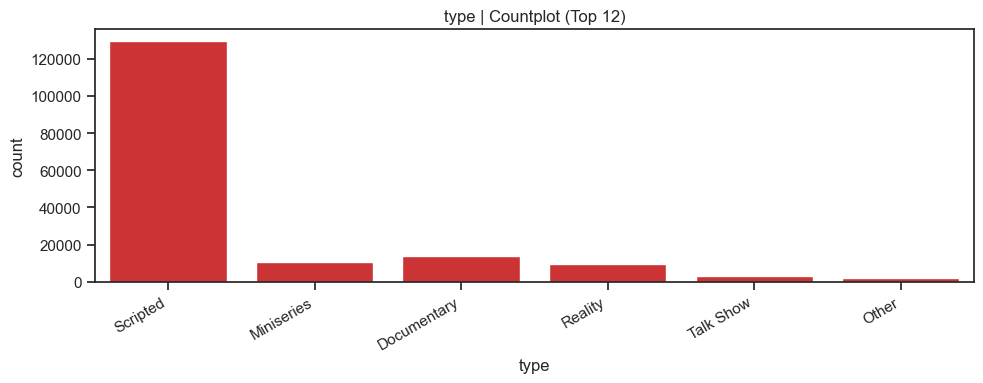

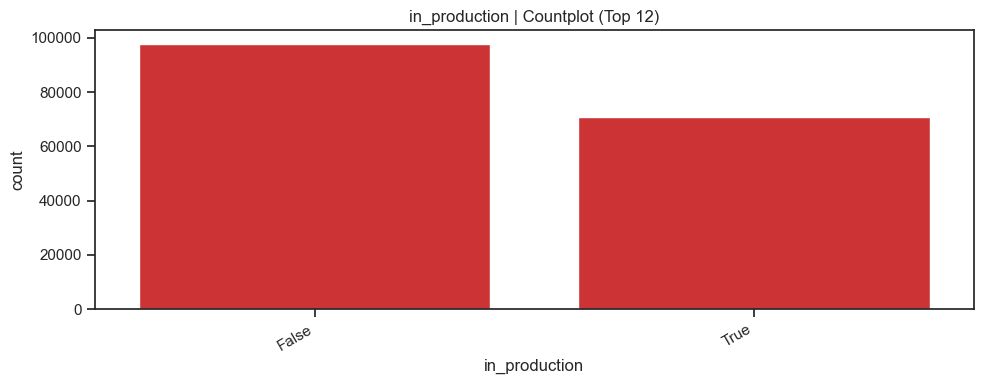

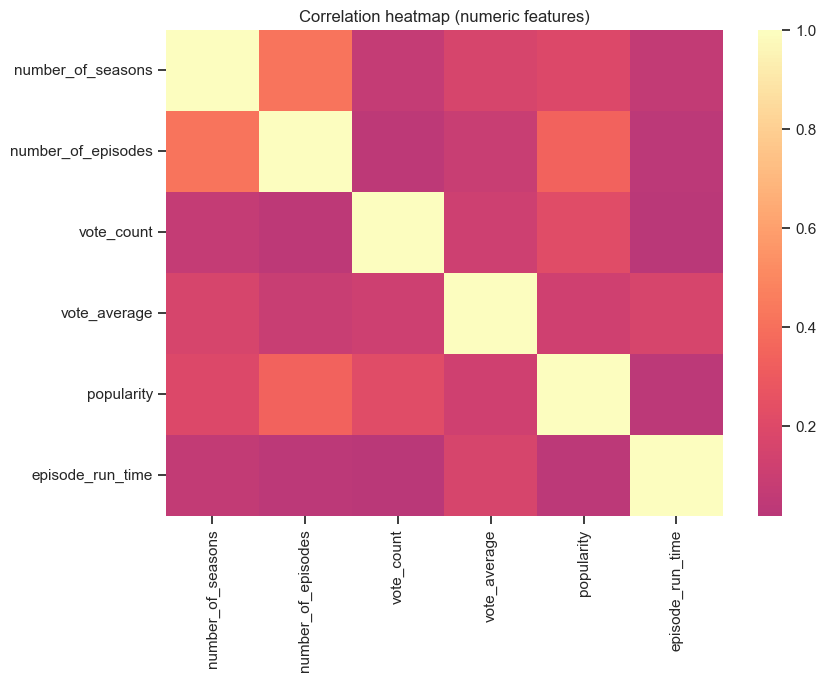

level_0            level_1          corr    abs_corr
6   number_of_episodes  number_of_seasons  0.416187  0.416187
10  number_of_episodes         popularity  0.342217  0.342217
26          popularity         vote_count  0.215926  0.215926
4    number_of_seasons         popularity  0.189827  0.189827
3    number_of_seasons       vote_average  0.160095  0.160095
33    episode_run_time       vote_average  0.157878  0.157878
27          popularity       vote_average  0.125295  0.125295
20        vote_average         vote_count  0.110259  0.110259
9   number_of_episodes       vote_average  0.093101  0.093101
2    number_of_seasons         vote_count  0.066078  0.066078

In [10]:
#--5--

# ספירת מופעים לכל תכונה קטגורית מרכזית + נורמליזציה לאחוזים
categoricals = [
    "type", "status", "original_language", "languages",
    "origin_country", "spoken_languages", "production_countries", "in_production", "adult"
]

# מציג טבלה קצרה של TOP-10 לכל תכונה (counts + percent)
for col in categoricals:
    print(f"\n=== {col} : top categories ===")
    vc = df[col].astype("category").value_counts(dropna=False)
    pct = (vc / len(df)).round(3)
    display(pd.DataFrame({"count": vc, "percent": pct}).head(10))


# ויזואליזציות בסיסיות עבור תכונות מספריות עיקריות (היסטוגרמות + boxplots)
numeric_cols = ["vote_average", "popularity", "vote_count",
                "number_of_seasons", "number_of_episodes", "episode_run_time"]

fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(12, 3*len(numeric_cols)))
for i, col in enumerate(numeric_cols):
    # היסטוגרמה (פיזור)
    sns.histplot(df[col].dropna(), ax=axes[i, 0])
    axes[i, 0].set_title(f"{col} | Histogram")
    # Boxplot (זיהוי חריגות)
    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f"{col} | Boxplot")
plt.tight_layout()
plt.show()

# Countplot לקטגוריות מרכזיות (Top-N כדי לשמור על קריאות)
key_cats = ["type", "status", "original_language", "in_production", "adult"]

for col in key_cats:
    plt.figure(figsize=(10,4))
    # מראים את TOP-12 קטגוריות נפוצות
    top_vals = df[col].value_counts().head(12).index
    sns.countplot(x=df[col].where(df[col].isin(top_vals), "Other"))
    plt.title(f"{col} | Countplot (Top 12)")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()



# מתאם בין תכונות מספריות (Pearson כברירת מחדל) + heatmap
num_df = df.select_dtypes(include=[np.number])

corr = num_df.corr(method="pearson")  # Pearson - כמו אצל המרצה
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=False, cmap="magma", center=0)
plt.title("Correlation heatmap (numeric features)")
plt.show()

# בונוס קטן: מציג TOP קשרים לפי ערך מוחלט, כדי למקד תובנות
corr_pairs = (corr.stack()
                   .reset_index(name="corr")
                   .query("level_0 < level_1")
                   .assign(abs_corr=lambda d: d["corr"].abs())
                   .sort_values("abs_corr", ascending=False)
                   .head(10))
display(corr_pairs)

Shape of your Data Set loaded: (168639, 29)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  5
    Number of String-Categorical Columns =  7
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  11
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  1
    29 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['tagline']
To fix these data quality issues in the dataset, impo

Number of All Scatter Plots = 3


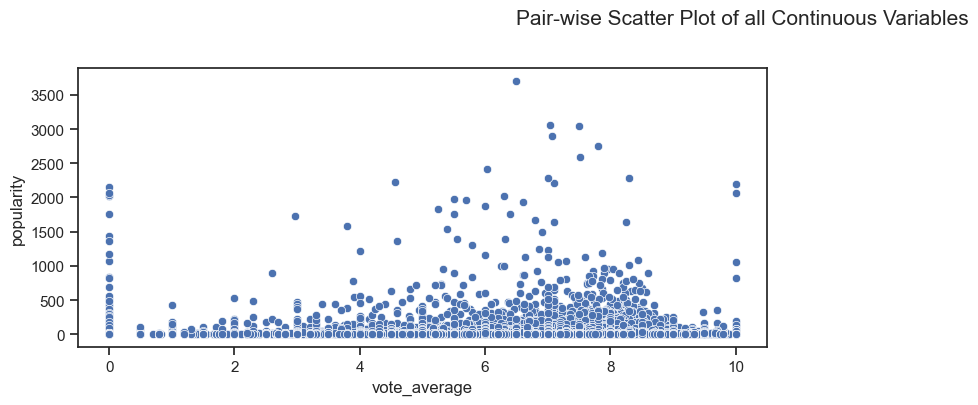

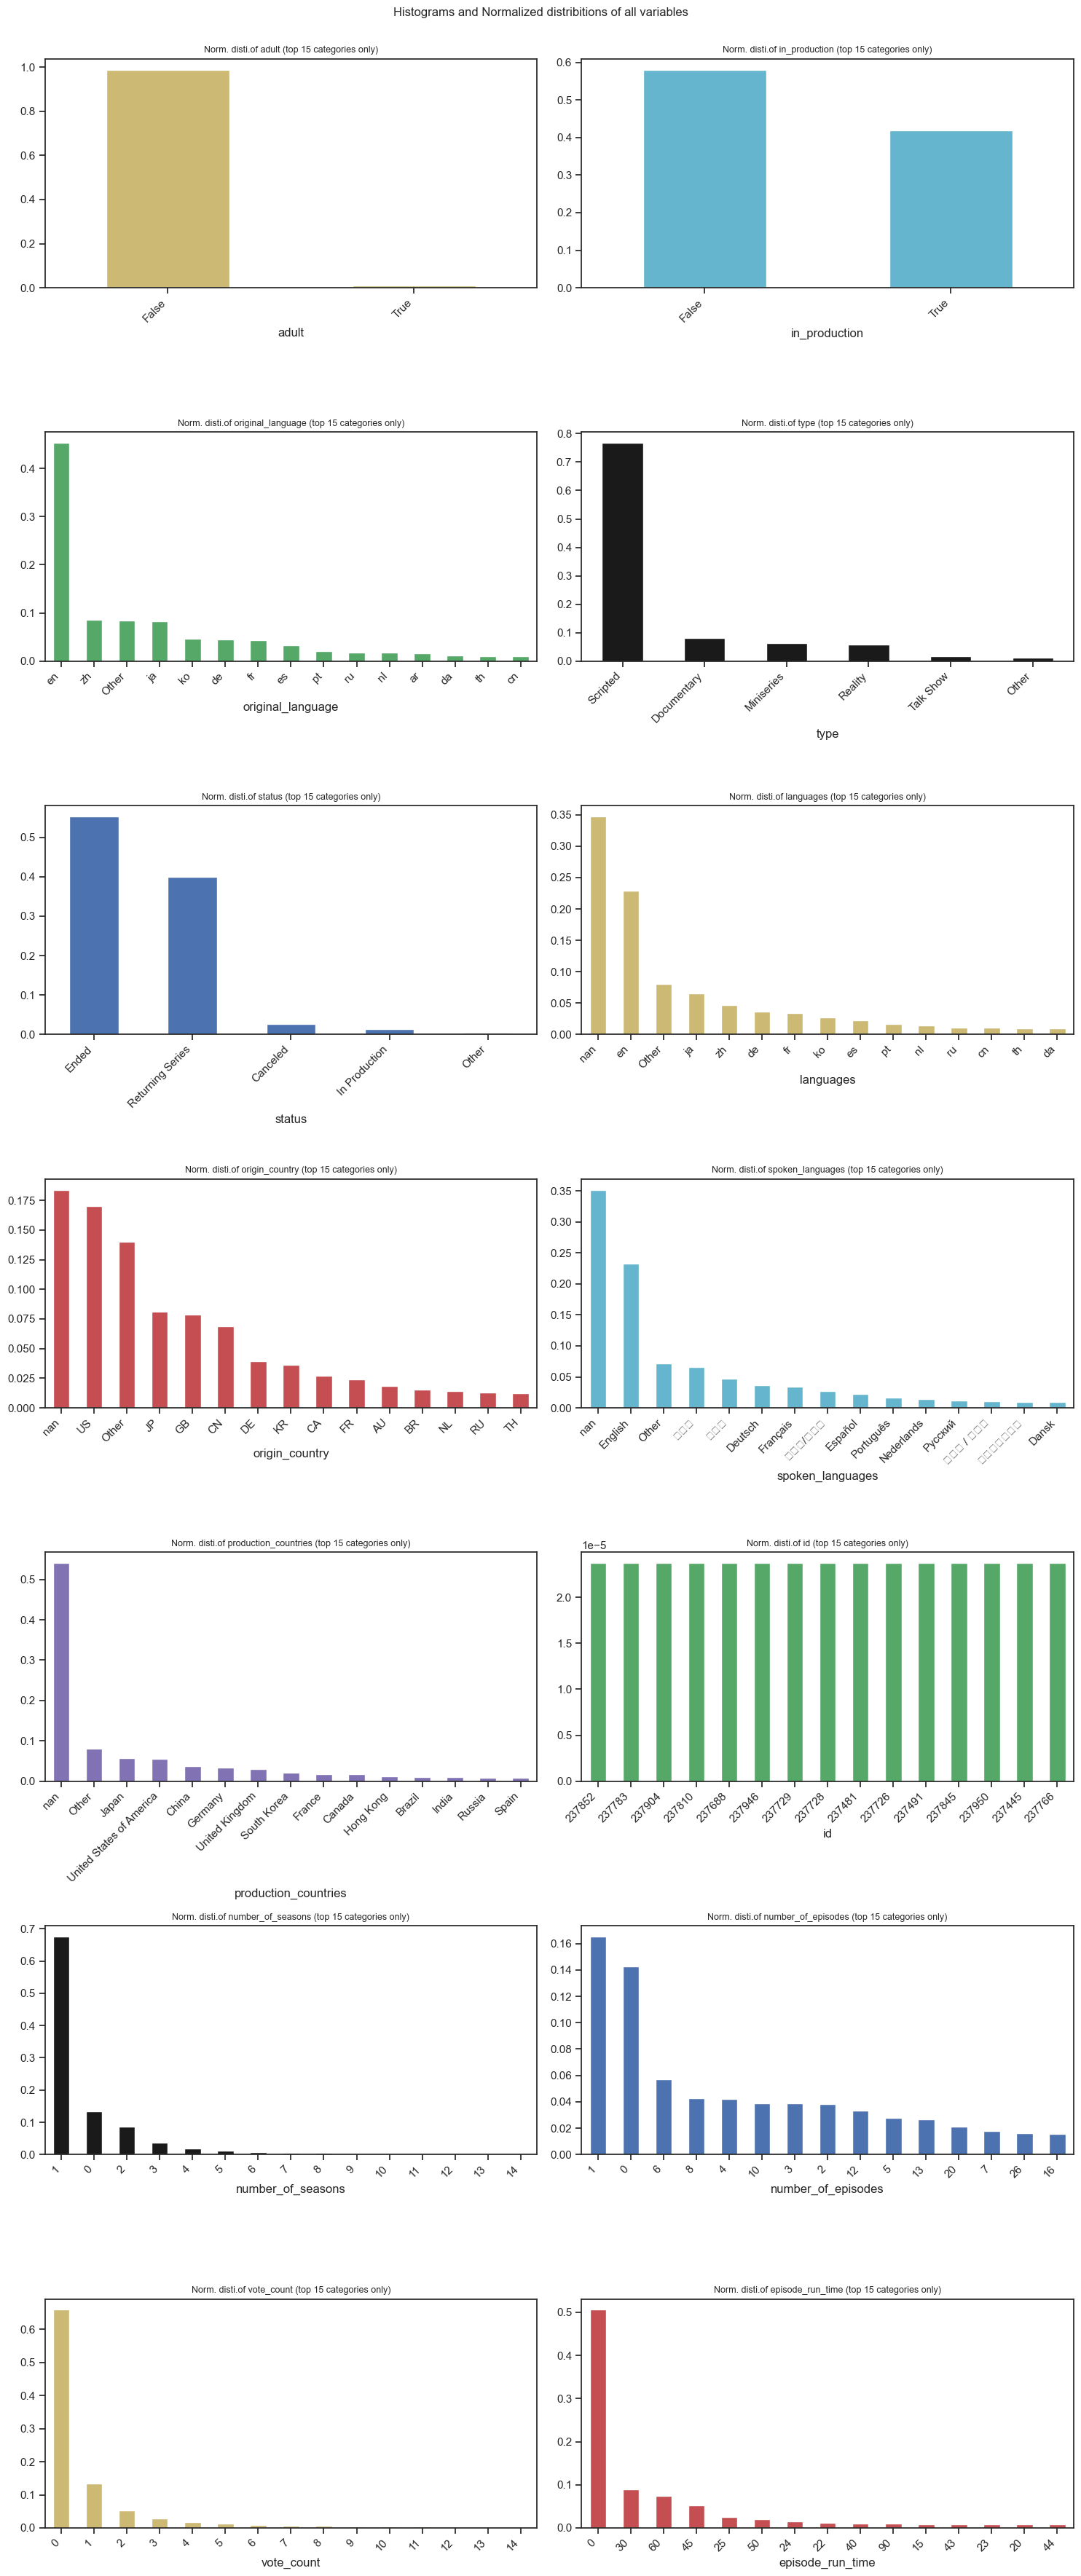

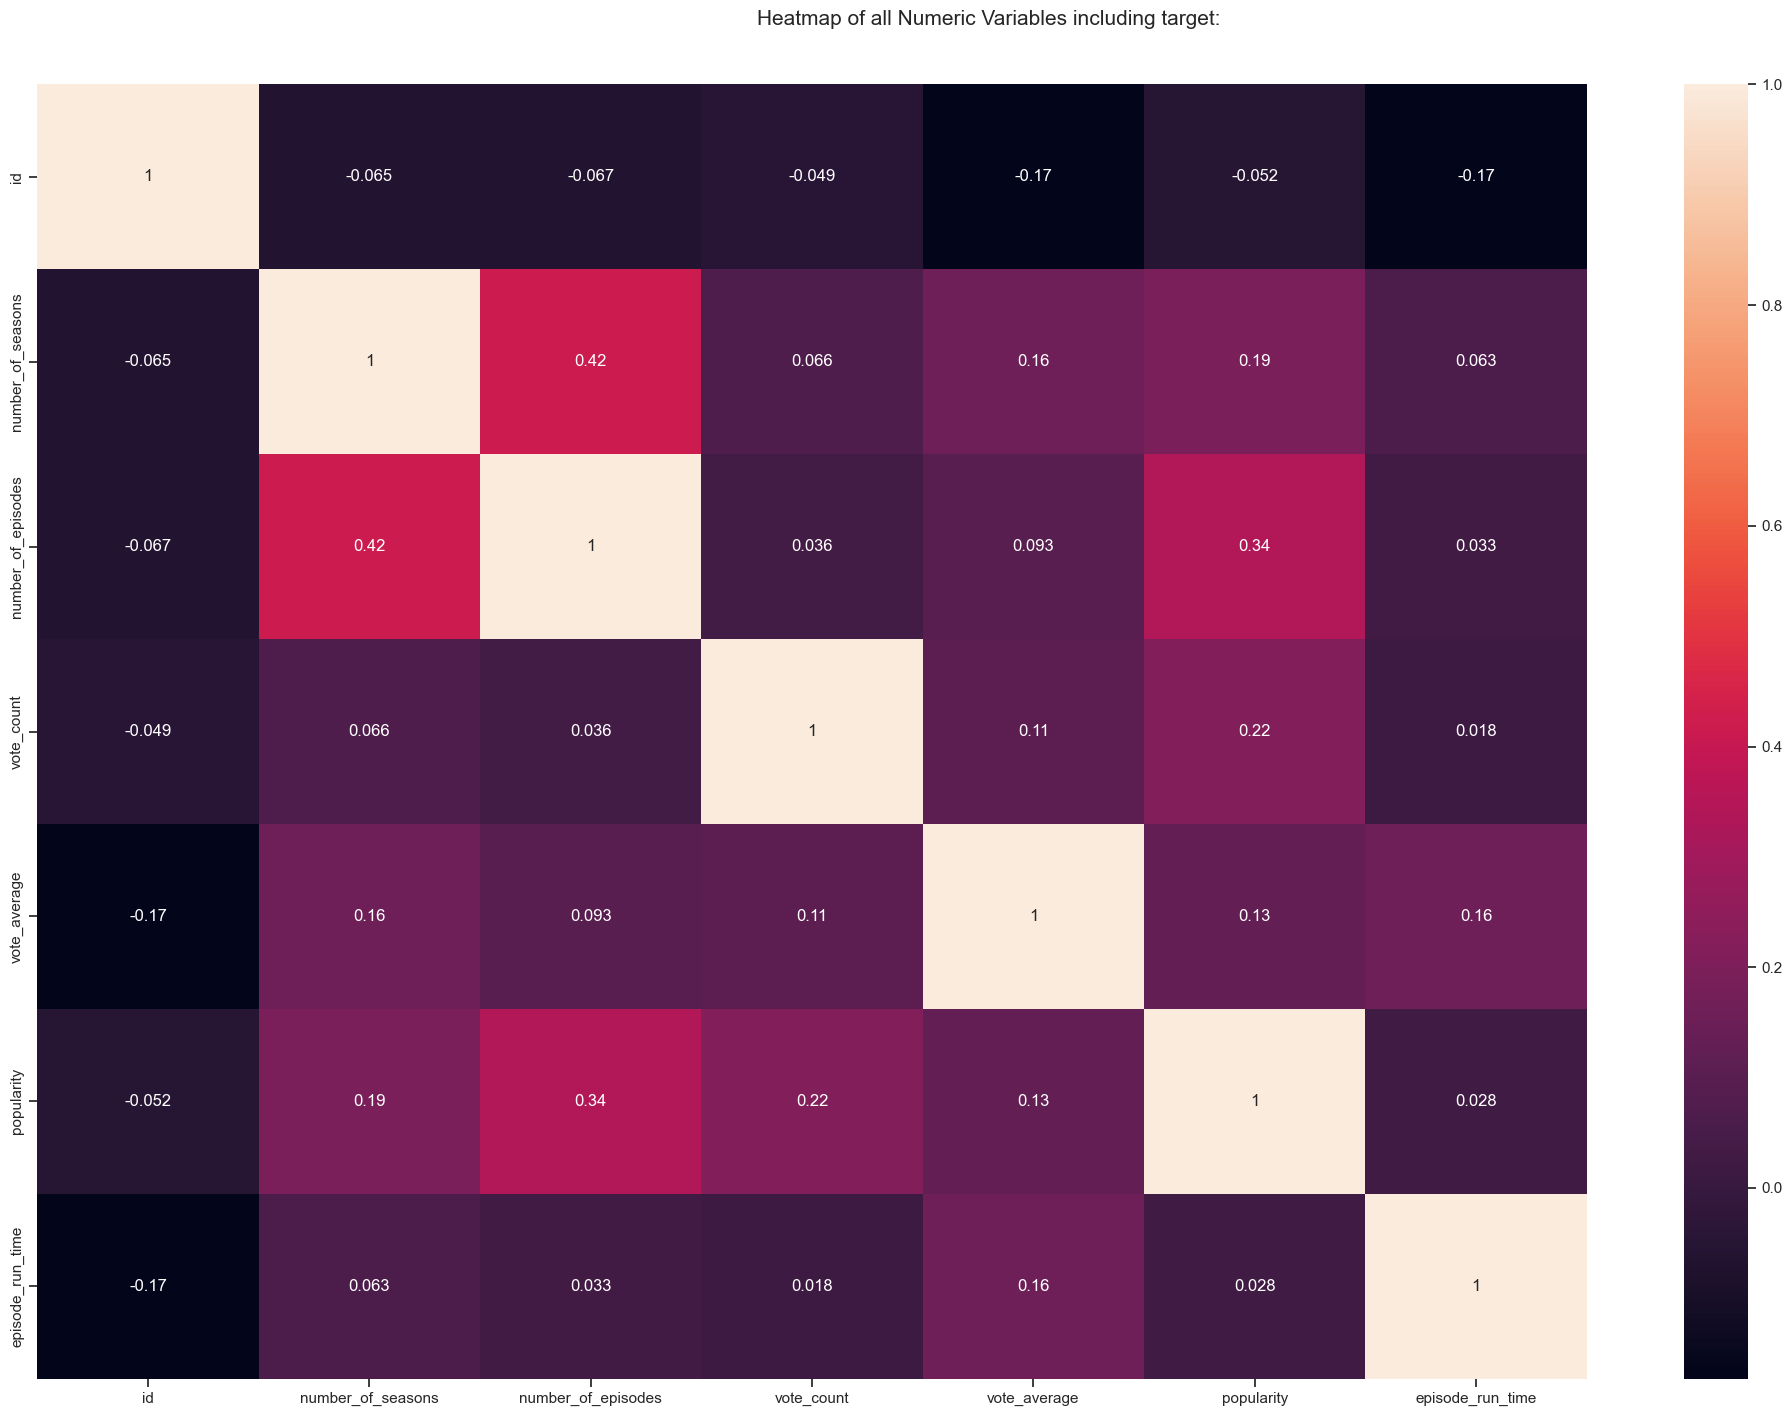

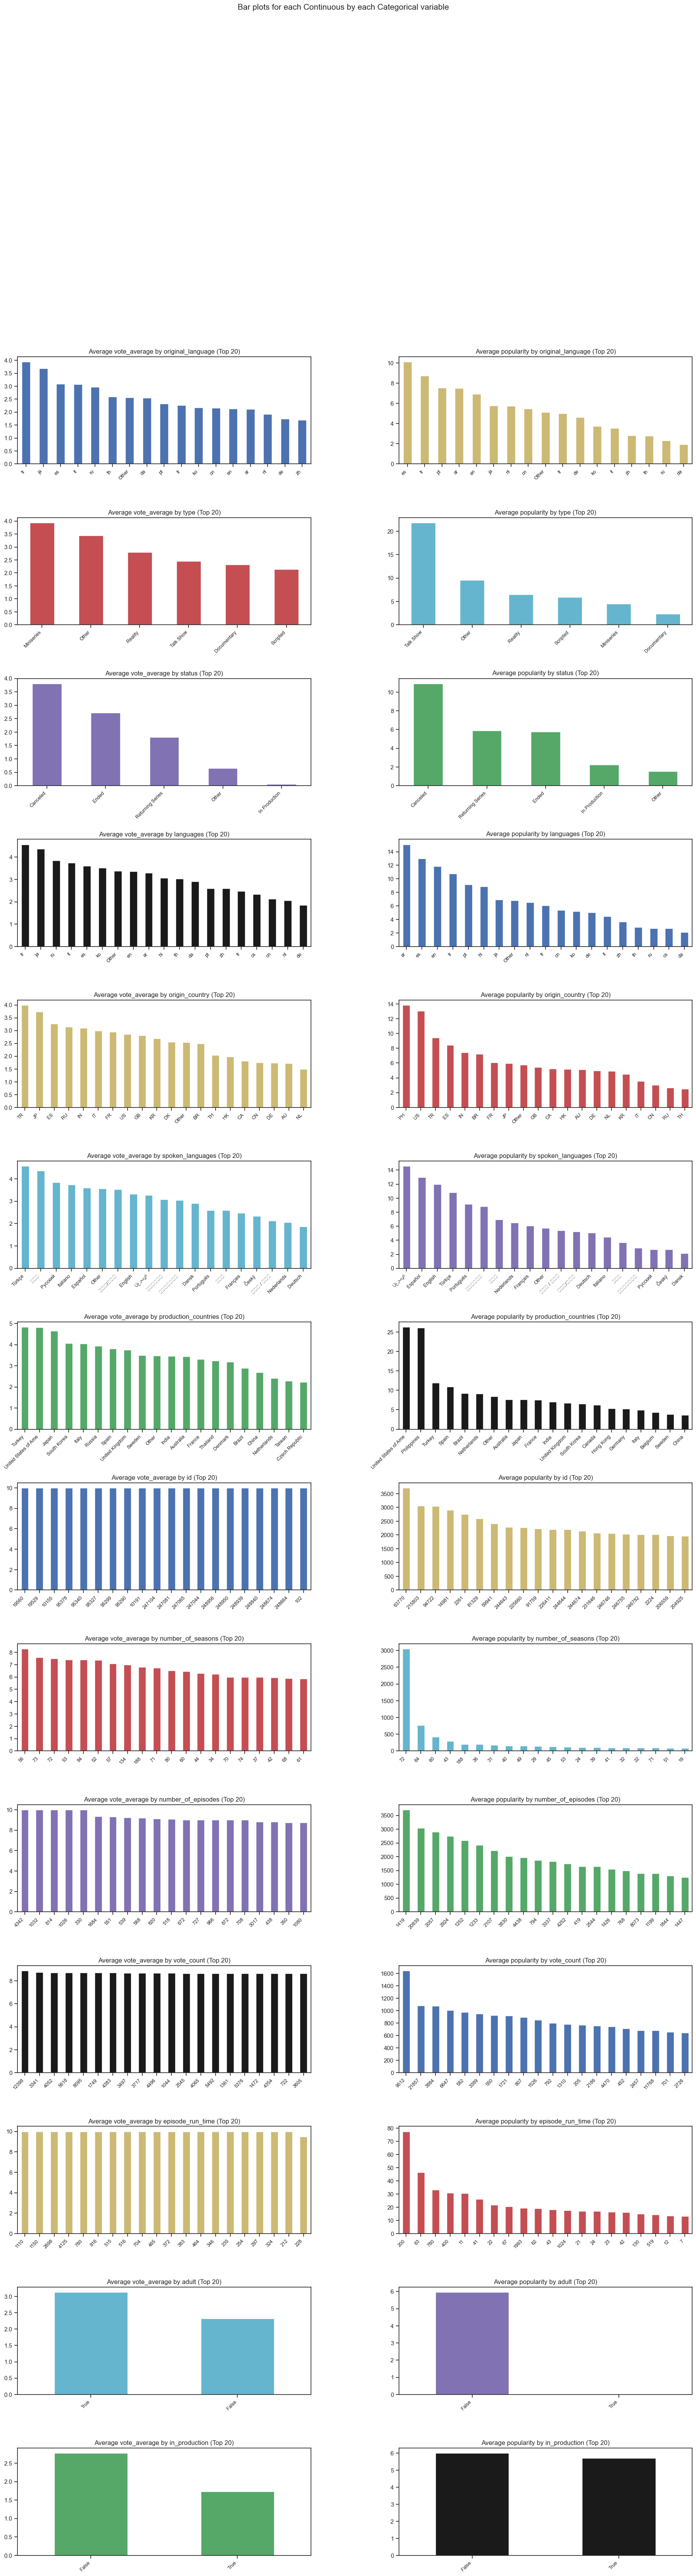

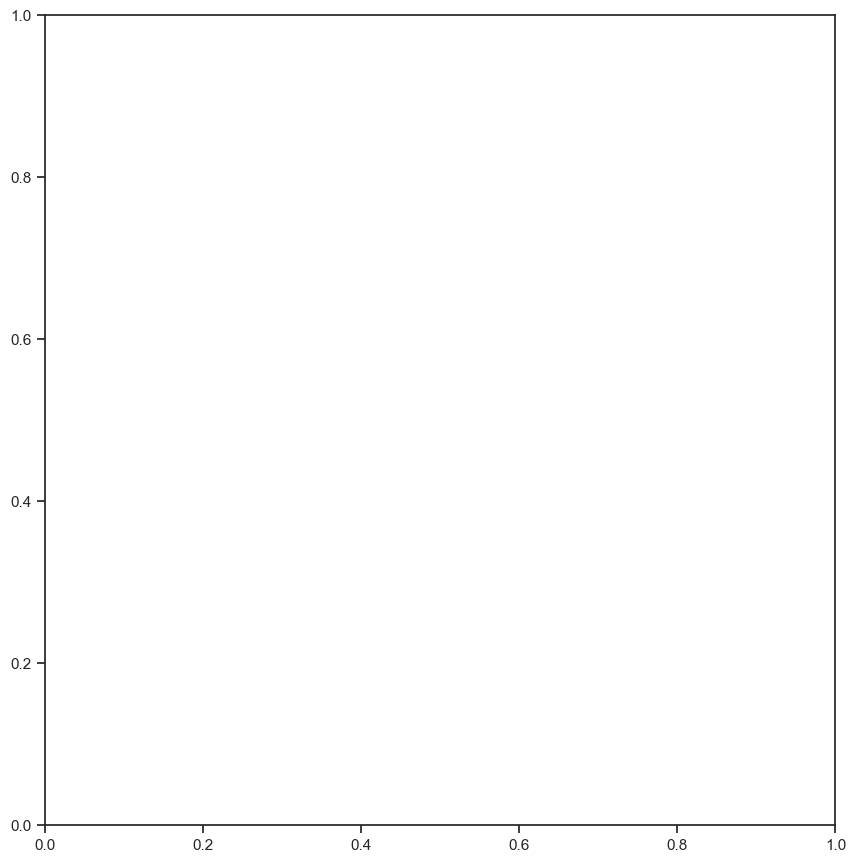

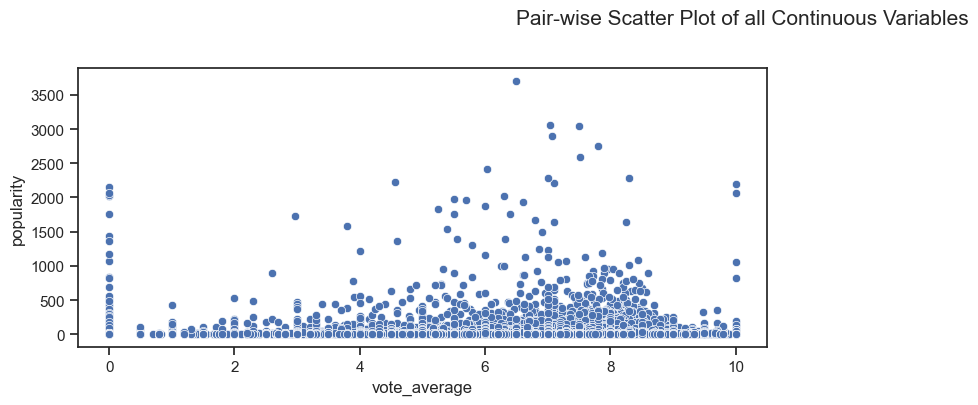

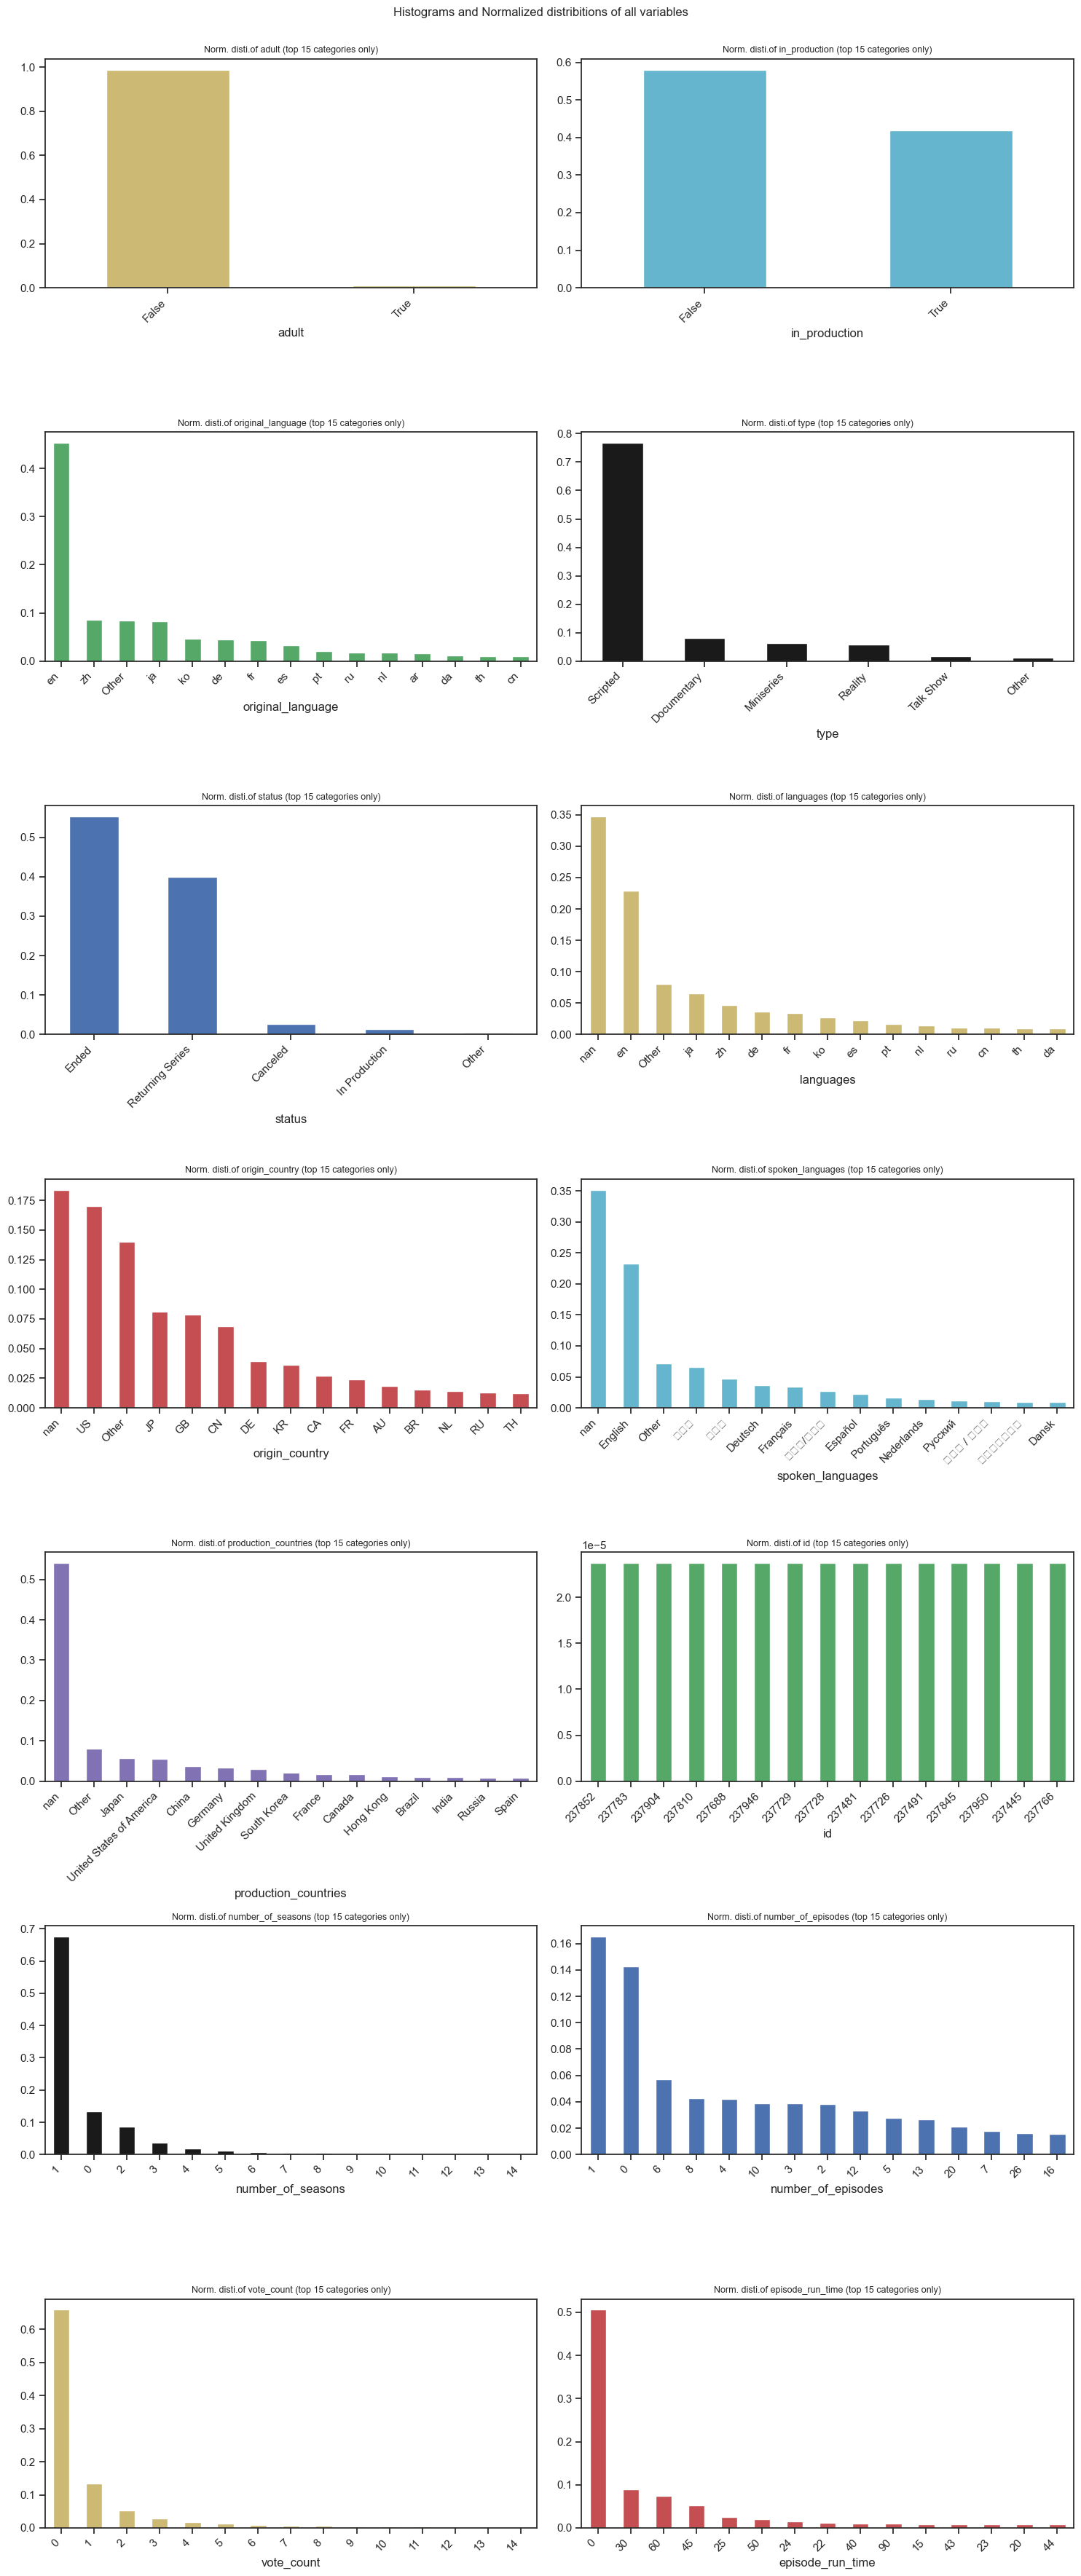

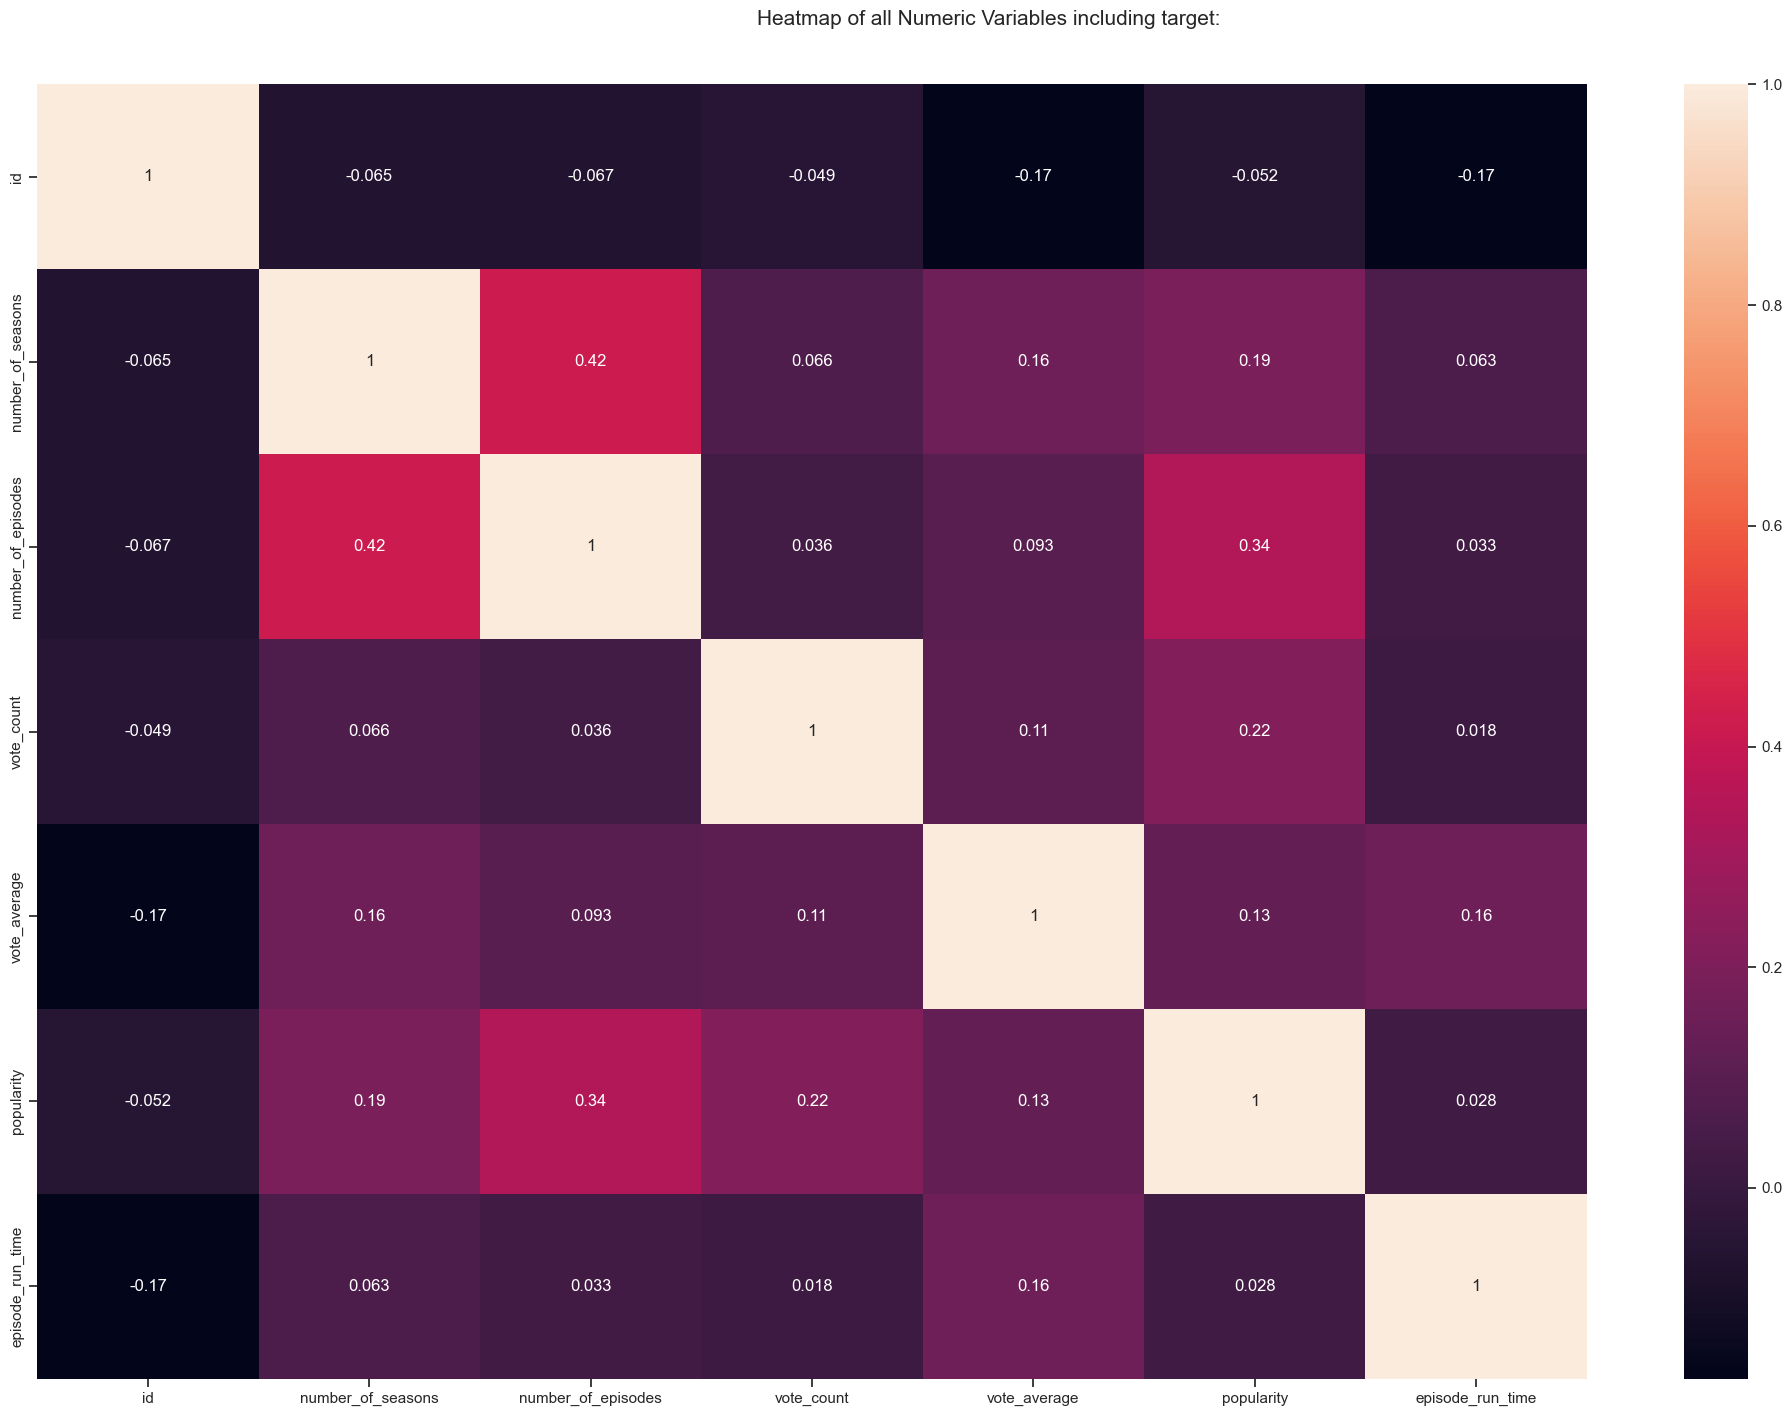

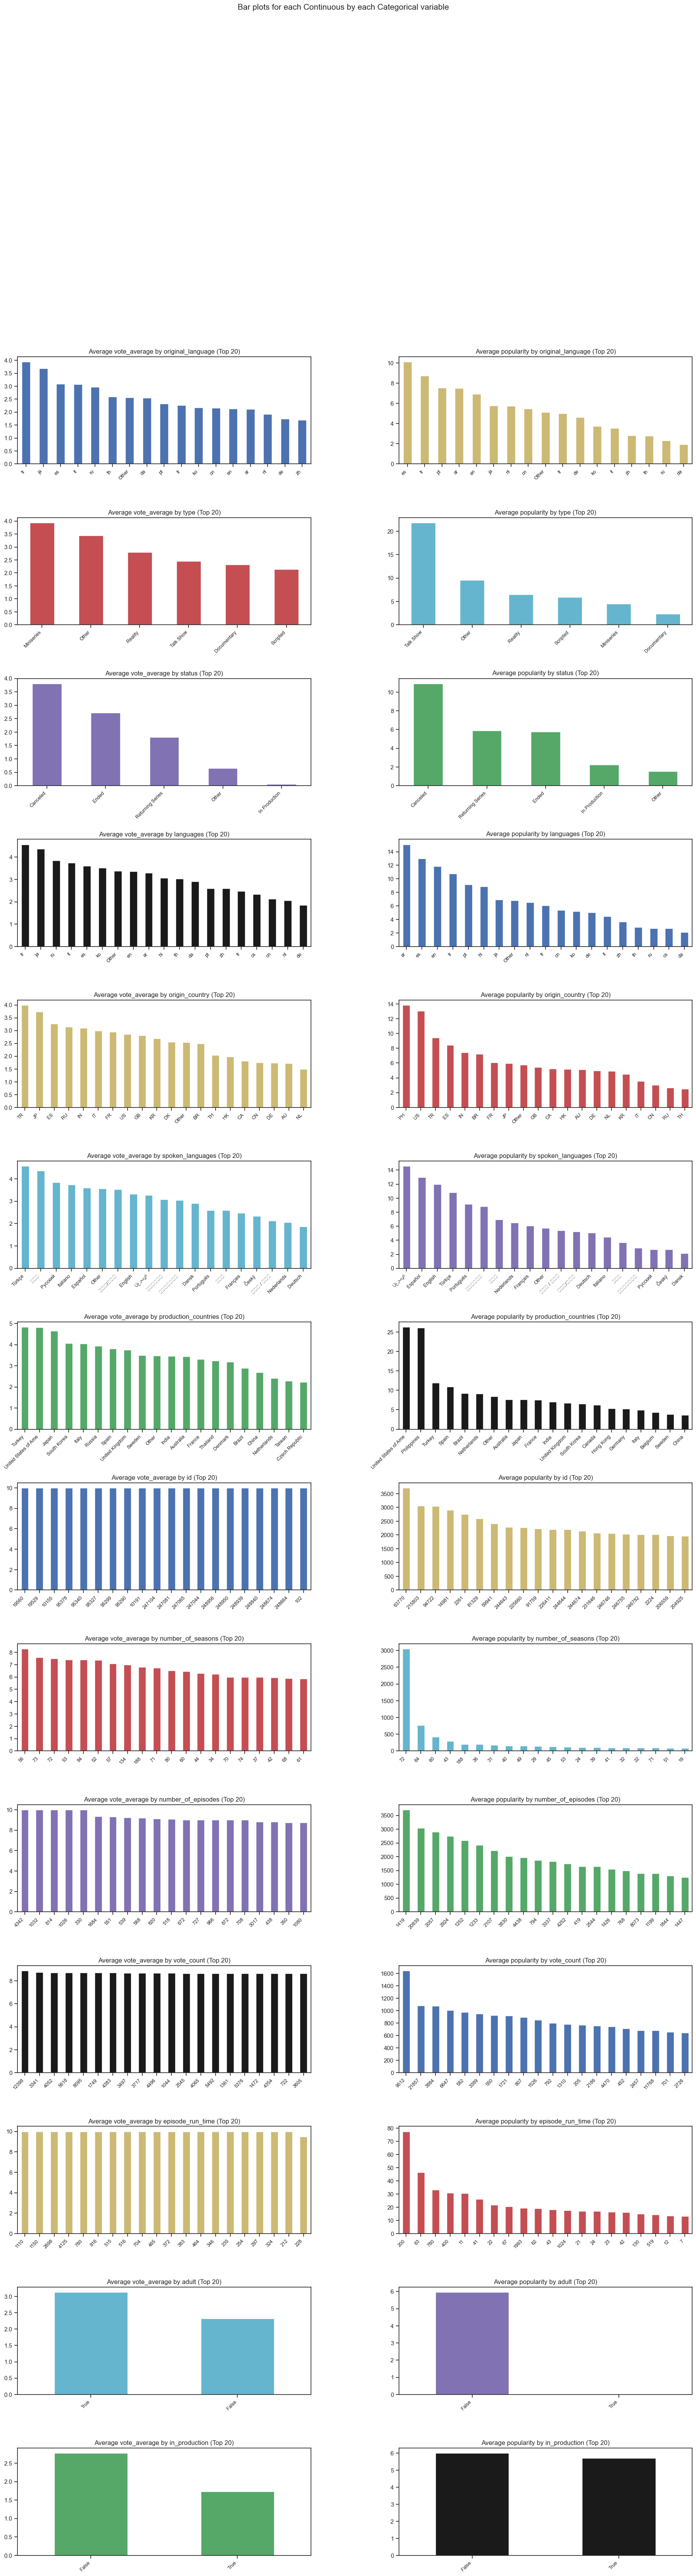

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |   

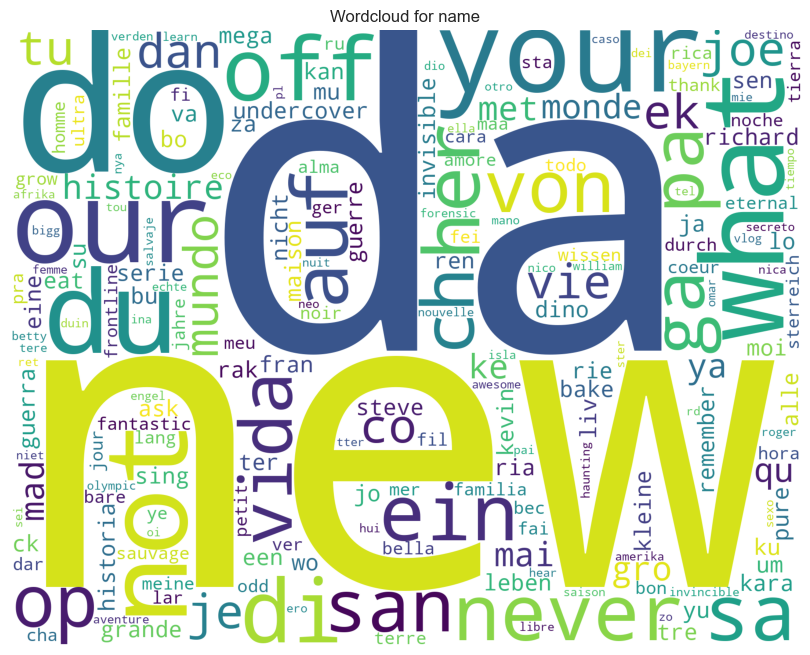

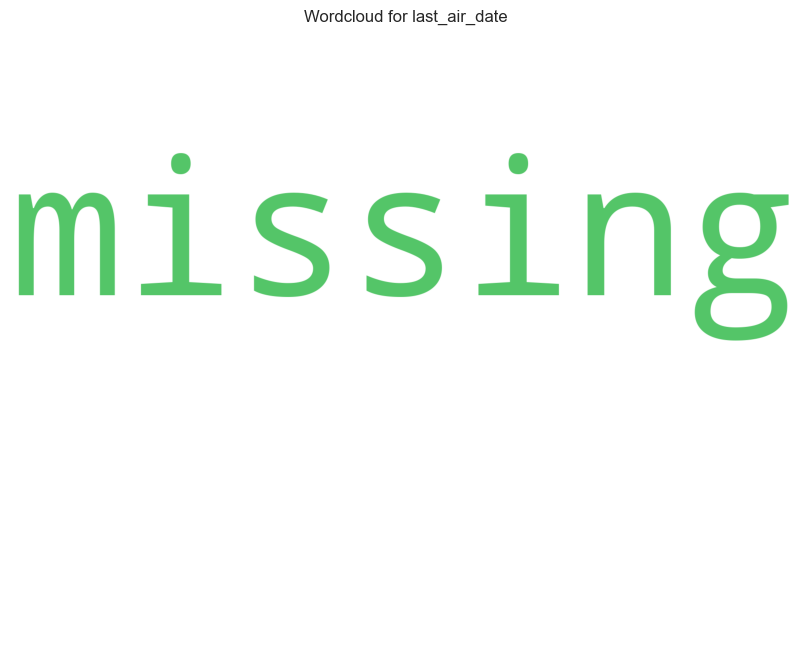

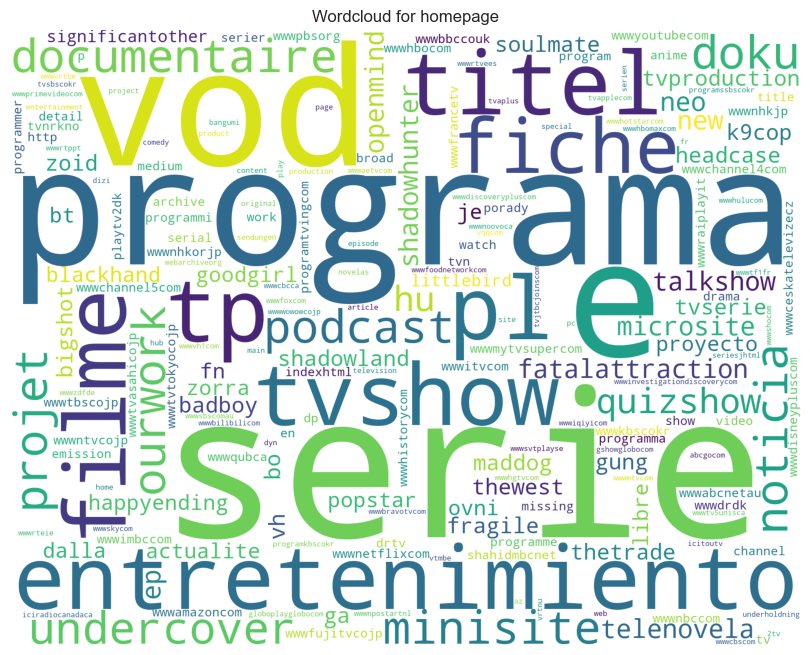

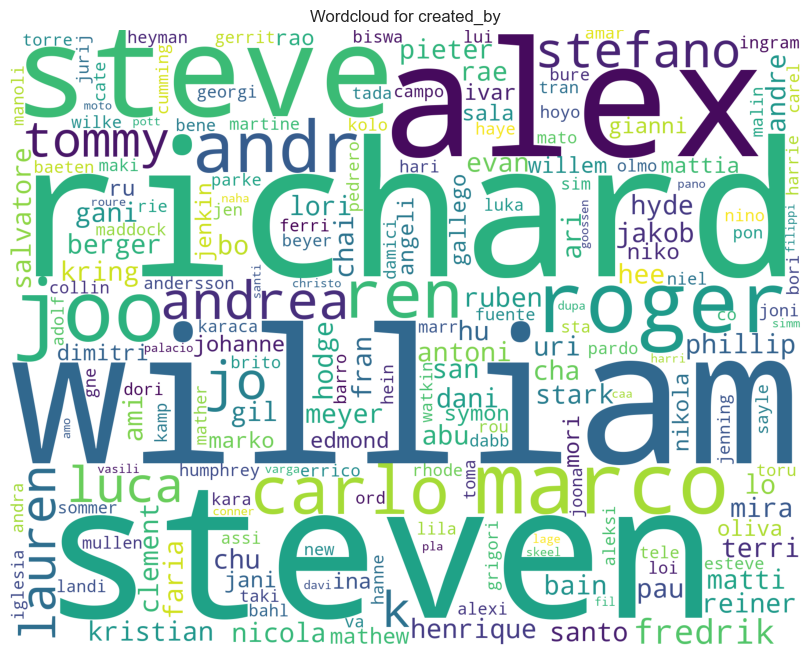

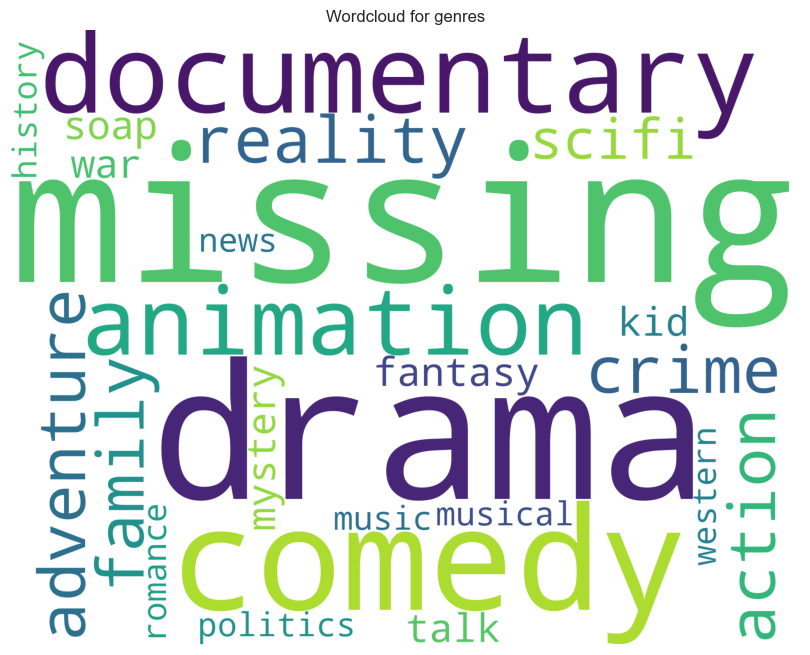

All Plots done
Time to run AutoViz = 382 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [7]:
#--6--

AV = AutoViz_Class()
_ = AV.AutoViz(
    r"C:\Users\user\Desktop\BIU דאטה סיינס\ML\פרויקט 2\פרויקט 2 - סופי\tmdb_tv_clean_v1.csv",
    max_rows_analyzed=200_000
)


In [ ]:
# -- 6A -- reports Summary & Insights

"""
============================
 Exploratory Data Analysis Summary
============================

1. Dataset Overview
-------------------
• The dataset includes ~168,000 TV shows and 29 variables.
• Multiple columns contain missing values, especially text-based ones (overview, poster_path, backdrop_path, homepage, created_by, production_companies).
• 'tagline' is a low-information column and will likely be dropped.
• ~1,300 duplicate rows were detected.
• Several categorical columns contain rare categories (e.g., status='Other', language='it').

2. Continuous Variables
-----------------------
• All numeric variables are highly skewed and non-normal.
• 'popularity' and 'vote_count' show strong right-skewed distributions with heavy tails (few extremely popular shows).
• 'vote_average' values cluster between 0–6, with many low-rated shows.
• 'episode_run_time' is concentrated around short episodes (~30 min), with a few extreme outliers.
• Most shows have only one season; very few exceed five seasons.

→ These variables capture show longevity and audience engagement—potentially predictive for renewal.

3. Categorical Variables
------------------------
• 'type': 75% of shows are Scripted; others (Documentary, Reality, Miniseries, Talk Show) are minorities.
• 'status': Dominated by 'Ended' and 'Returning Series'; 'Canceled' and 'In Production' appear rarely.
• 'original_language' / 'languages' / 'spoken_languages': English dominates (~45%), followed by Chinese, Japanese, Korean, etc.
• 'origin_country' / 'production_countries': Mostly USA, Japan, and UK; many missing or 'Other'.
• 'adult': Almost all entries are non-adult (False).
• 'in_production': Roughly balanced between True/False.

→ These categorical fields are unevenly distributed and will require encoding and grouping before modeling.

4. Relationships & Correlations
-------------------------------
• 'number_of_seasons' ↔ 'number_of_episodes': strong positive correlation (r≈0.42).
• 'popularity' ↔ 'vote_count': moderate positive correlation (r≈0.22).
• Other pairwise correlations are weak—no multicollinearity concerns.

5. Grouped Averages
-------------------
• By Type: 'Miniseries' receive the highest average ratings; 'Talk Shows' have the highest popularity.
• By Status: 'Canceled' shows tend to have both higher popularity and higher ratings than 'Returning Series'.
• By Country: US and Philippines show highest average popularity; Turkey and Japan have top average ratings.
• By Language: English and Spanish dominate popularity, while Turkish and Japanese shows score higher on ratings.
• By Production Country: US, Japan, and South Korea appear most active, but popularity peaks vary.

→ Insight: Popularity and engagement indicators (vote_count, popularity, longevity) show stronger links to renewal likelihood than average ratings alone.

6. Key Takeaways
----------------
• The data requires cleaning (missing values, outliers, low-info columns).
• Variables likely to retain predictive value: popularity, vote_count, number_of_seasons, number_of_episodes, status, in_production.
• Variables likely to be dropped: tagline, text-paths, homepage, overview.
• English-language, scripted shows dominate the dataset—potential source of class imbalance.
• Next steps:
    - Clean and encode categorical variables.
    - Handle missing values and outliers.
    - Proceed to feature engineering and modeling (predicting renewal).

============================
End of EDA Summary
============================
"""


In [9]:
#--7--

df.describe()

number_of_seasons  number_of_episodes   vote_count    vote_average   \
count    168639.000000       168639.000000    168639.000000  168639.000000   
mean          1.548497           24.465082        13.305054       2.333843   
std           2.942872          134.799622       190.809059       3.454334   
min           0.000000            0.000000         0.000000       0.000000   
25%           1.000000            1.000000         0.000000       0.000000   
50%           1.000000            6.000000         0.000000       0.000000   
75%           1.000000           20.000000         1.000000       6.000000   
max         240.000000        20839.000000     21857.000000      10.000000   

        popularity    episode_run_time  
count  168639.000000    168639.000000   
mean        5.882644        22.603348   
std        42.023216        47.950427   
min         0.000000         0.000000   
25%         0.600000         0.000000   
50%         0.857000         0.000000   
75%         2.431500        42.000000   
max      3707.008000      6032.000000

In [11]:
#--8--

# Categorical feature frequencies - imbalance check

categoricals = [
    "type", "status", "original_language", "languages",
    "origin_country", "spoken_languages", "production_countries",
    "in_production", "adult"
]

for col in categoricals:
    print(f"\n=== {col} : top categories ===")
    vc = df[col].astype("category").value_counts(dropna=False)
    pct = (vc / len(df)).round(4) * 100
    display(pd.DataFrame({"count": vc, "percent": pct}).head(12))



=== type : top categories ===


count  percent
type                        
Scripted     129301   76.67 
Documentary   13864    8.22 
Miniseries    10810    6.41 
Reality        9682    5.74 
Talk Show      2997    1.78 
Other          1985    1.18


=== status : top categories ===


count  percent
status                          
Ended             93232   55.28 
Returning Series  67507   40.03 
Canceled           4634    2.75 
In Production      2380    1.41 
Other               886    0.53


=== original_language : top categories ===


count  percent
original_language                
en                 76304   45.25 
zh                 14422    8.55 
Other              14249    8.45 
ja                 14048    8.33 
ko                  7820    4.64 
de                  7712    4.57 
fr                  7290    4.32 
es                  5602    3.32 
pt                  3551    2.11 
ru                  2963    1.76 
nl                  2923    1.73 
ar                  2638    1.56


=== languages : top categories ===


count  percent
languages                
NaN        58589   34.74 
en         38671   22.93 
Other      13627    8.08 
ja         11051    6.55 
zh          7883    4.67 
de          6204    3.68 
fr          5745    3.41 
ko          4520    2.68 
es          3853    2.28 
pt          2789    1.65 
nl          2427    1.44 
ru          1898    1.13


=== origin_country : top categories ===


count  percent
origin_country                
NaN             31030   18.40 
US              28759   17.05 
Other           23601   13.99 
JP              13658    8.10 
GB              13298    7.89 
CN              11651    6.91 
DE               6607    3.92 
KR               6146    3.64 
CA               4528    2.69 
FR               4015    2.38 
AU               3135    1.86 
BR               2564    1.52


=== spoken_languages : top categories ===


count  percent
spoken_languages                
NaN               59359   35.20 
English           39251   23.28 
Other             12175    7.22 
日本語               11053    6.55 
普通话                7892    4.68 
Deutsch            6209    3.68 
Français           5750    3.41 
한국어/조선말            4522    2.68 
Español            3861    2.29 
Português          2794    1.66 
Nederlands         2429    1.44 
Pусский            1901    1.13


=== production_countries : top categories ===


count  percent
production_countries                    
NaN                       91128   54.04 
Other                     13584    8.06 
Japan                      9682    5.74 
United States of America   9315    5.52 
China                      6167    3.66 
Germany                    5615    3.33 
United Kingdom             5142    3.05 
South Korea                3623    2.15 
France                     2884    1.71 
Canada                     2841    1.68 
Hong Kong                  1927    1.14 
Brazil                     1801    1.07


=== in_production : top categories ===


count  percent
in_production                
False          97866   58.03 
True           70773   41.97


=== adult : top categories ===


count  percent
adult                 
False  166600   98.79 
True     2039    1.21

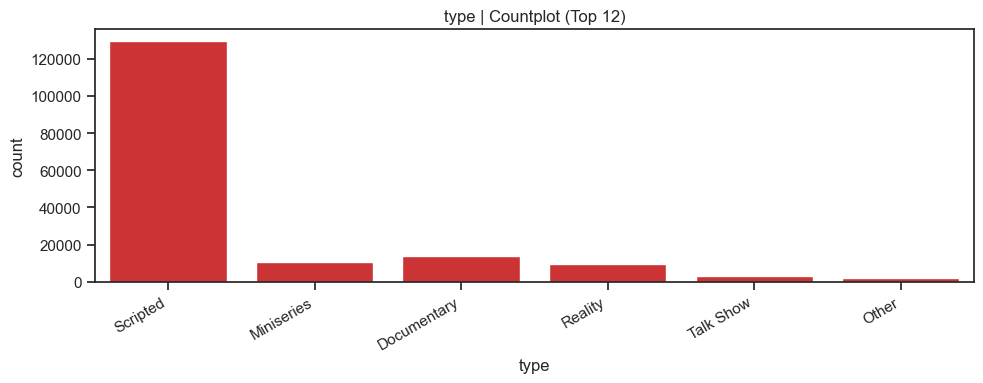

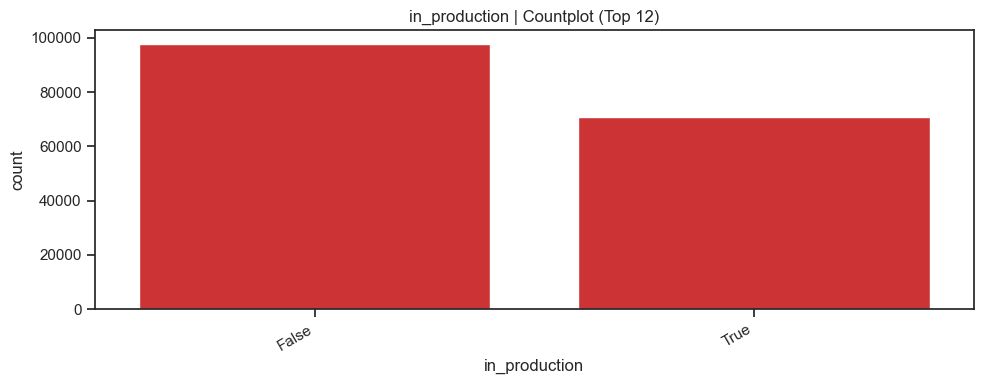

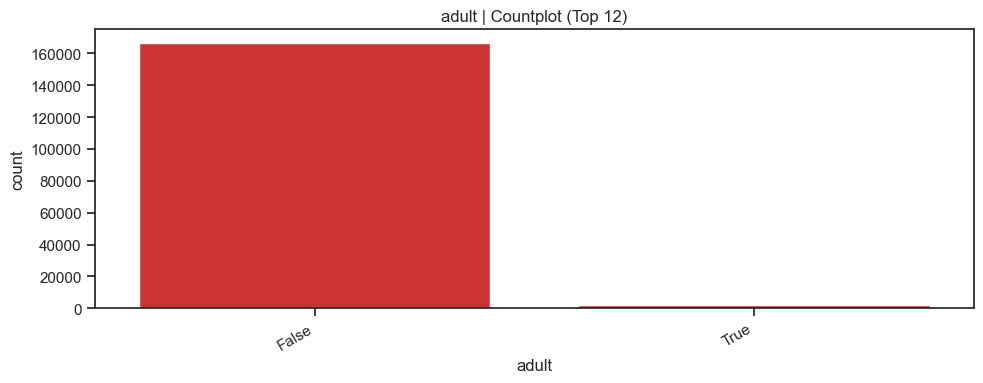

In [12]:
#--9--

# Visual tools (histograms, boxplots, countplots) for key features

# ========= Numeric features =========
numeric_cols = [
    "vote_average", "popularity", "vote_count",
    "number_of_seasons", "number_of_episodes", "episode_run_time"
]

fig, axes = plt.subplots(len(numeric_cols), 2, figsize=(12, 3.2*len(numeric_cols)))

for i, col in enumerate(numeric_cols):
    # היסטוגרמה - להבין פיזור/סקיואנס
    sns.histplot(df[col].dropna(), ax=axes[i, 0])
    axes[i, 0].set_title(f"{col} | Histogram")

    # בוקספלוט - לזהות חריגים בצורה ברורה
    sns.boxplot(x=df[col], ax=axes[i, 1])
    axes[i, 1].set_title(f"{col} | Boxplot")

plt.tight_layout()
plt.show()

# ========= Categorical features =========
# נבחר קטגוריות מרכזיות ונציג TOP-N כדי לשמור על קריאות
key_cats = ["type", "status", "original_language", "in_production", "adult"]
TOP_N = 12  # אפשר לשנות לפי הצורך

for col in key_cats:
    plt.figure(figsize=(10,4))
    # מחליפים רמות נדירות ל-"Other" כדי למנוע עומס
    top_vals = df[col].value_counts().head(TOP_N).index
    plot_series = df[col].where(df[col].isin(top_vals), "Other")
    sns.countplot(x=plot_series)
    plt.title(f"{col} | Countplot (Top {TOP_N})")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()


In [13]:
#--10--

# Correlation matrix (numeric features only) – Pearson by default
# הערות בעברית; כותרות באנגלית; פלט אינליין בלבד

import numpy as np
import pandas as pd

# בוחרים רק עמודות נומריות
num_df = df.select_dtypes(include=[np.number])

# Pearson correlation (ברירת מחדל לפי מה שלמדנו)
corr_pearson = num_df.corr(method="pearson")

# תצוגה קריאה: מעגלים ל-2 ספרות ומציגים חלק מהטבלה
print("=== Correlation Matrix (Pearson) – rounded to 2 decimals ===")
display(corr_pearson.round(2))

# אופציונלי (אם תרצי להשוות): Spearman – למקרי אי-נורמליות/סדר (לא חייב עכשיו)
# corr_spearman = num_df.corr(method="spearman")

# "זוגות הכי מתואמים" לפי ערך מוחלט – כדי לזהות תלות חזקה (ללא ויזואליזציה בשלב זה)
top_pairs = (
    corr_pearson.stack()
    .reset_index(name="corr")
    .query("level_0 < level_1")             # מסירים כפילויות ואלכסון
    .assign(abs_corr=lambda d: d["corr"].abs())
    .sort_values("abs_corr", ascending=False)
    .head(10)
)

print("\n=== Top correlated numeric pairs (Pearson) ===")
display(top_pairs)


=== Correlation Matrix (Pearson) – rounded to 2 decimals ===


number_of_seasons  number_of_episodes  vote_count  \
number_of_seasons         1.00                0.42            0.07      
number_of_episodes        0.42                1.00            0.04      
vote_count                0.07                0.04            1.00      
vote_average              0.16                0.09            0.11      
popularity                0.19                0.34            0.22      
episode_run_time          0.06                0.03            0.02      

                    vote_average  popularity  episode_run_time  
number_of_seasons       0.16         0.19           0.06        
number_of_episodes      0.09         0.34           0.03        
vote_count              0.11         0.22           0.02        
vote_average            1.00         0.13           0.16        
popularity              0.13         1.00           0.03        
episode_run_time        0.16         0.03           1.00


=== Top correlated numeric pairs (Pearson) ===


level_0            level_1          corr    abs_corr
6   number_of_episodes  number_of_seasons  0.416187  0.416187
10  number_of_episodes         popularity  0.342217  0.342217
26          popularity         vote_count  0.215926  0.215926
4    number_of_seasons         popularity  0.189827  0.189827
3    number_of_seasons       vote_average  0.160095  0.160095
33    episode_run_time       vote_average  0.157878  0.157878
27          popularity       vote_average  0.125295  0.125295
20        vote_average         vote_count  0.110259  0.110259
9   number_of_episodes       vote_average  0.093101  0.093101
2    number_of_seasons         vote_count  0.066078  0.066078

In [14]:
#--11--

# Identify multicollinearity / strong numeric dependencies from the Pearson matrix

thr = 0.80  # סף תלות חזקה מקובל ב-EDA
pairs_strong = (
    corr_pearson.stack()
    .reset_index(name="corr")
    .query("level_0 < level_1")            # להסיר כפילויות ואלכסון
    .assign(abs_corr=lambda d: d["corr"].abs())
    .query("abs_corr >= @thr")
    .sort_values("abs_corr", ascending=False)
)

print(f"=== Pairs with |r| >= {thr} (potential multicollinearity) ===")
if pairs_strong.empty:
    print("No pairs exceed the threshold — no strong multicollinearity detected.")
else:
    display(pairs_strong)


=== Pairs with |r| >= 0.8 (potential multicollinearity) ===
No pairs exceed the threshold — no strong multicollinearity detected.


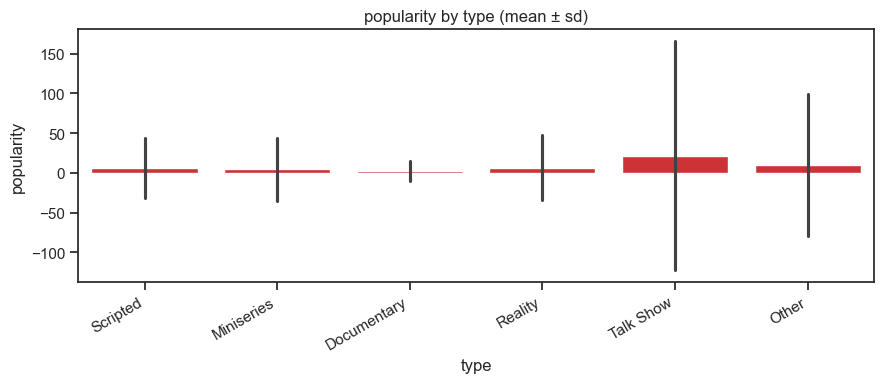

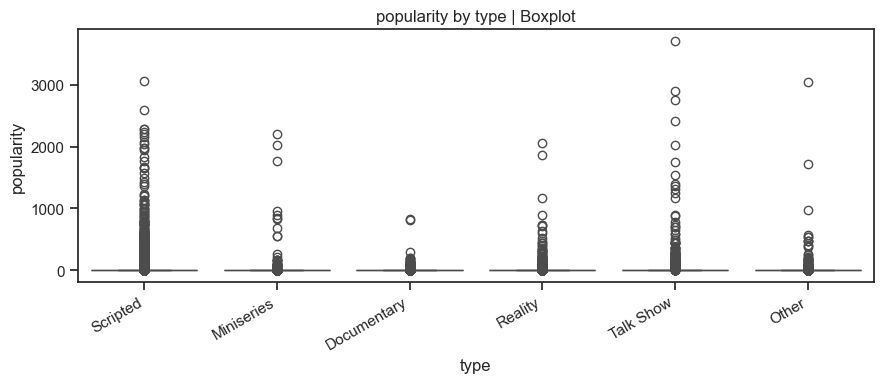

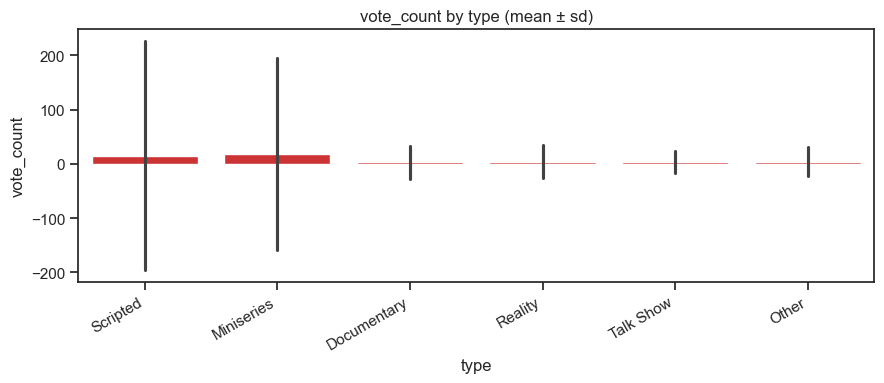

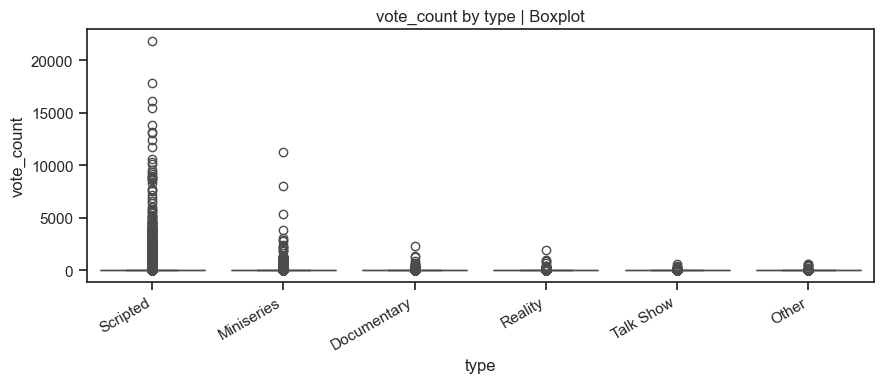

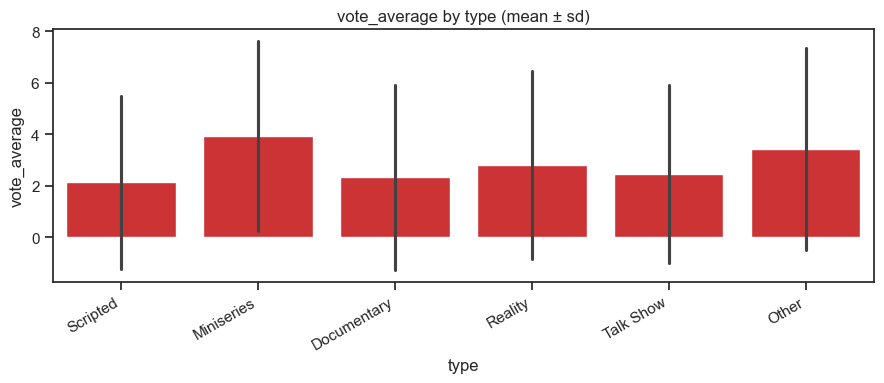

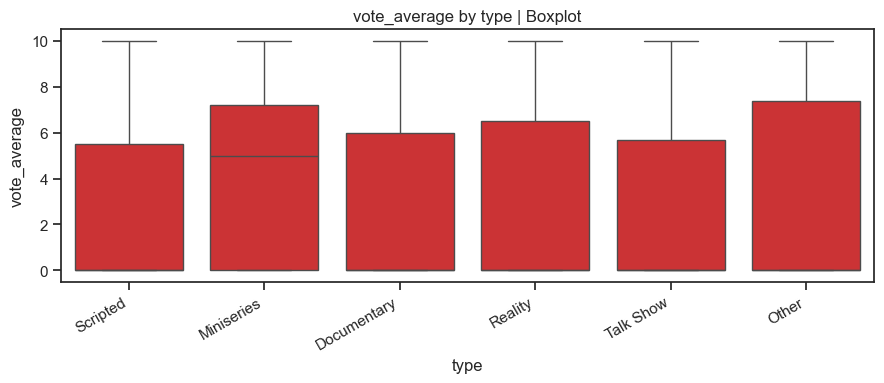

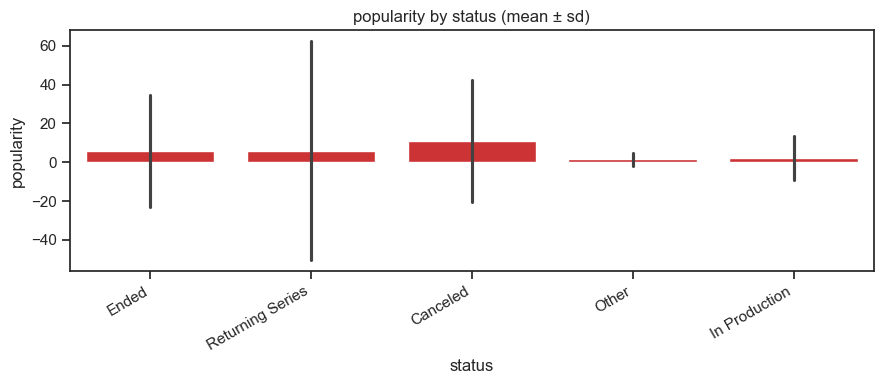

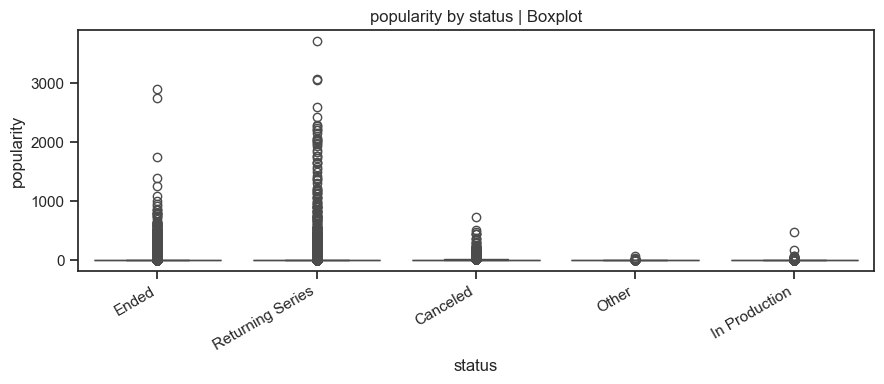

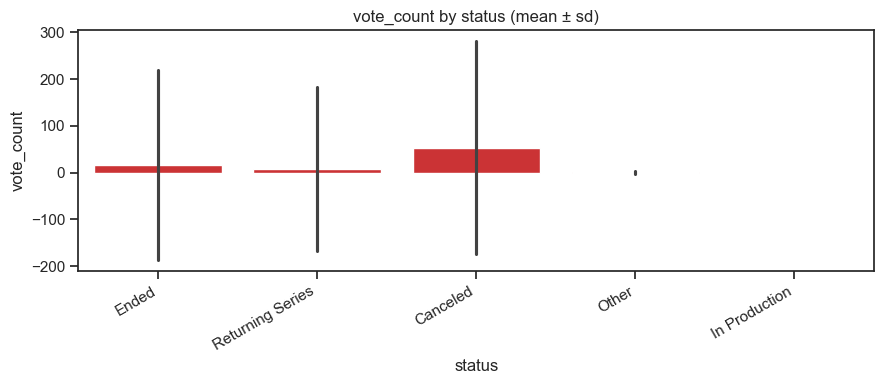

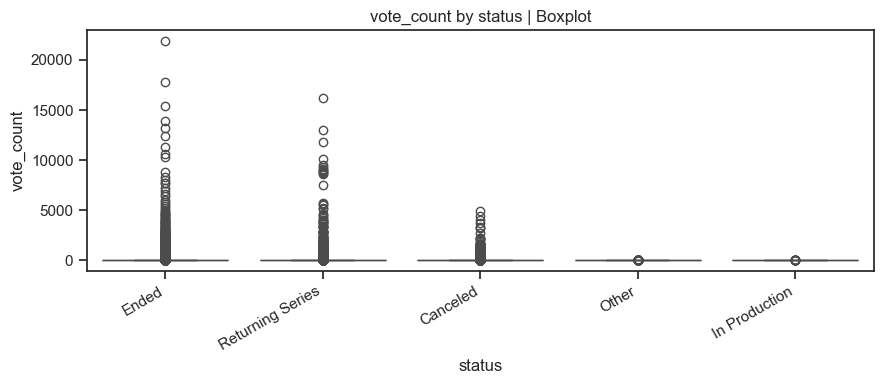

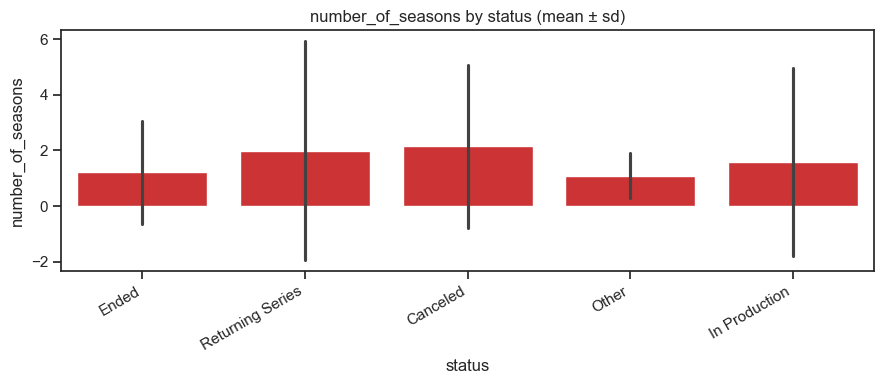

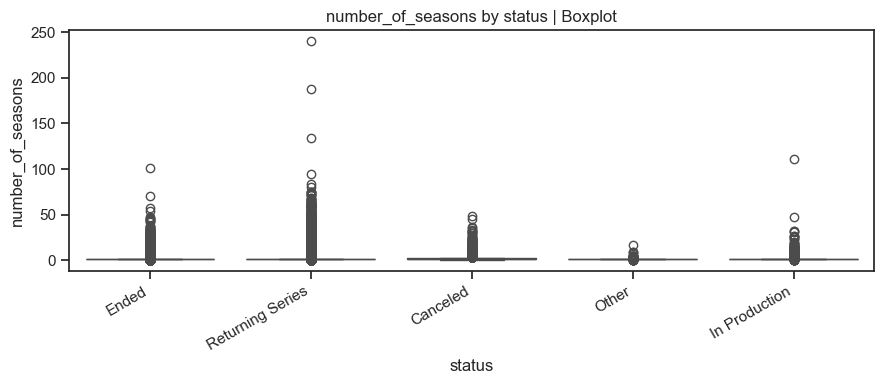

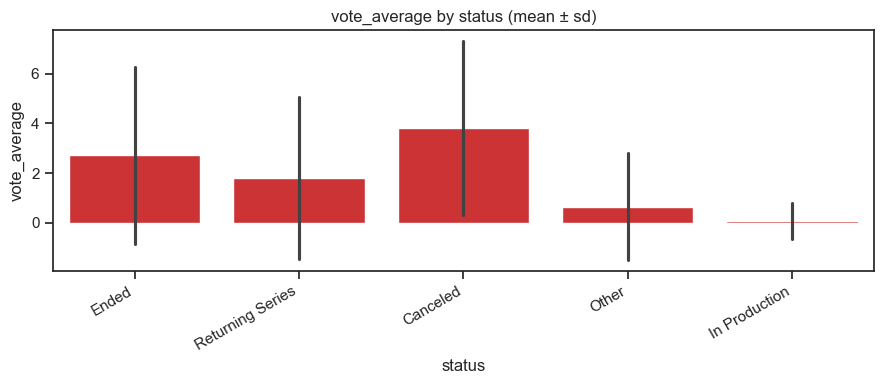

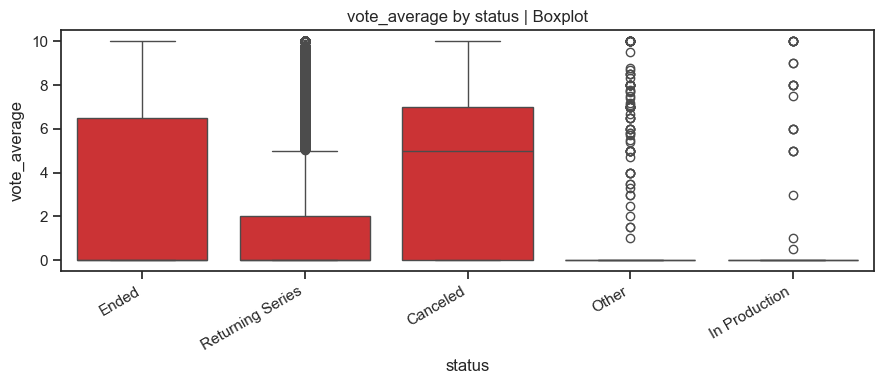

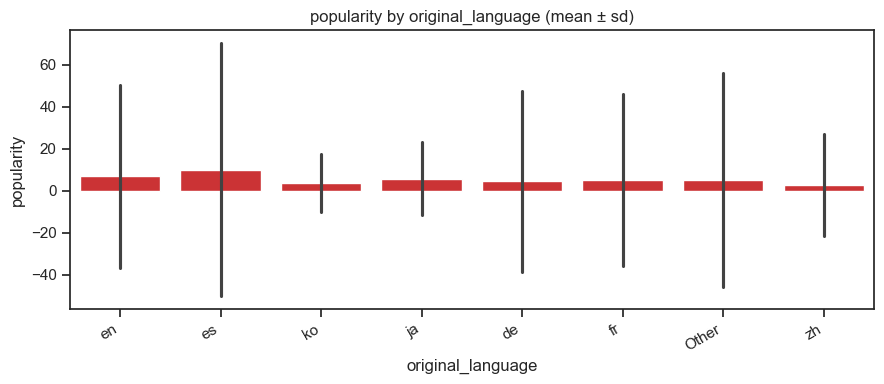

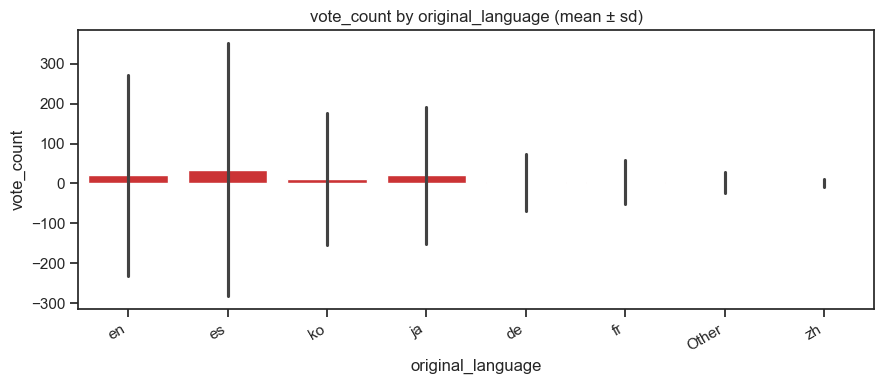

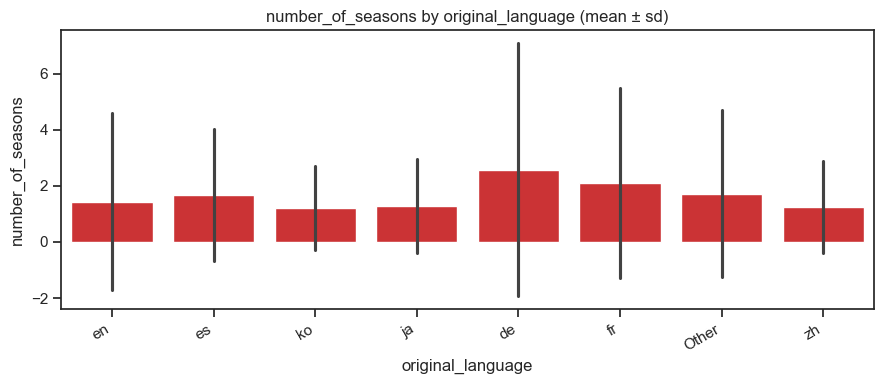

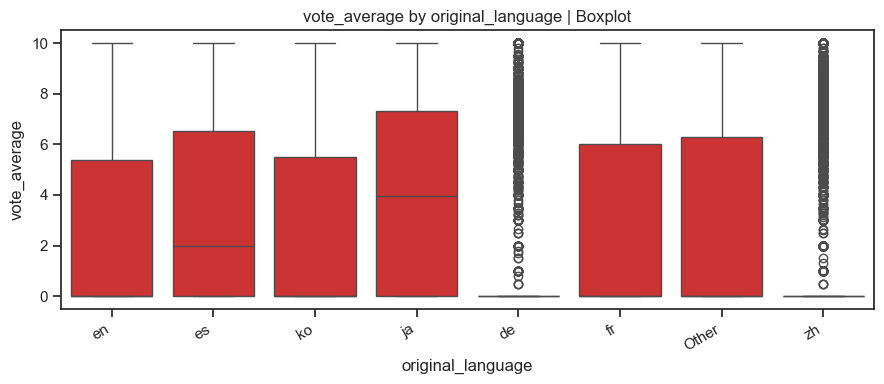

In [15]:
#--12--

# Examine categorical–numeric relationships using plots
# בר פלוס בוקספלוט כדי לראות ממוצעים ופיזורים בין קבוצות

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def topN_or_other(s, top=8):
    """מאחד קטגוריות נדירות ל-'Other' לצורך תצוגה בלבד"""
    top_vals = s.value_counts().head(top).index
    return s.where(s.isin(top_vals), "Other")

# קטגוריות מרכזיות שחשוב לבדוק מול משתנים נומריים
cat_targets = ["type", "status", "original_language"]
num_targets = ["popularity", "vote_count", "number_of_seasons", "vote_average"]

for cat in cat_targets:
    g = topN_or_other(df[cat], top=8)  # מאחד רמות נדירות
    for num in num_targets:
        plt.figure(figsize=(9,4))
        sns.barplot(x=g, y=df[num], estimator=np.mean, errorbar="sd")
        plt.title(f"{num} by {cat} (mean ± sd)")
        plt.xticks(rotation=30, ha="right")
        plt.tight_layout()
        plt.show()

        plt.figure(figsize=(9,4))
        sns.boxplot(x=g, y=df[num])
        plt.title(f"{num} by {cat} | Boxplot")
        plt.xticks(rotation=30, ha="right")
        plt.tight_layout()
        plt.show()


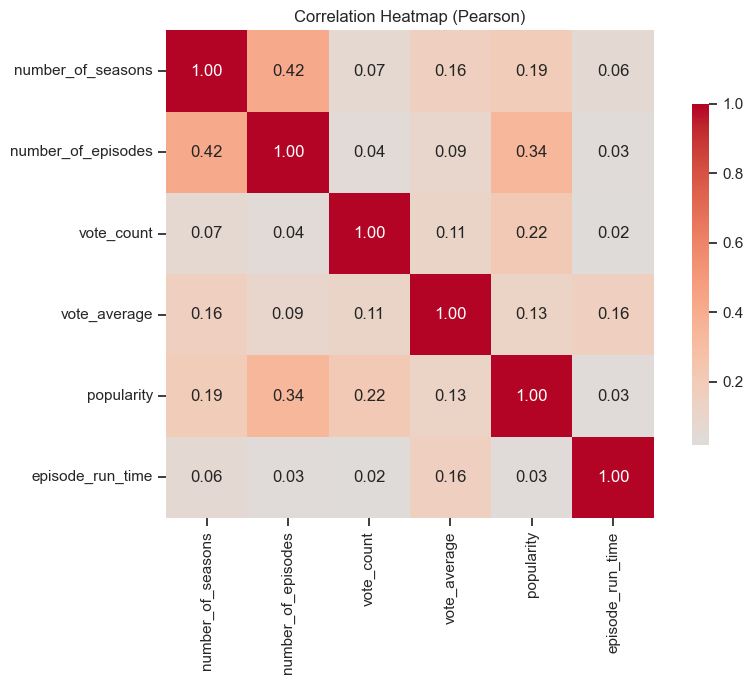

In [16]:
#--13--

# Visualize correlation strengths using a heatmap
# מטריצה של מתאמים בין משתנים נומריים (Pearson)

# בוחרים רק את המשתנים הנומריים
num_df = df.select_dtypes(include=[np.number])

# חישוב מטריצת מתאמים
corr = num_df.corr(method="pearson")

# ויזואליזציה
plt.figure(figsize=(9,7))
sns.heatmap(
    corr,
    annot=True,                # מציג ערכי r בתוך הריבועים
    fmt=".2f",
    cmap="coolwarm",           # סקאלה אדום–כחול
    center=0,
    square=True,
    cbar_kws={"shrink": .7}
)
plt.title("Correlation Heatmap (Pearson)")
plt.tight_layout()
plt.show()
